# Predicting Depression 

In [136]:
# Importing numpy and setting a random seed
import numpy as np
np.random.seed(123)

In [137]:
# Importing packages and setting a couple of style options
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [138]:
# Setting pandas to display max columns and rows
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', None)

# Setting pandas inf values to be nan
pd.set_option('mode.use_inf_as_na', True)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [139]:
# This will cause the project functions py file to keep refreshed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
# Loading in the custom project functions and some tools to look at them
import project_functions as pf
import inspect
from IPython.display import Markdown, display

# Train Test Split

In [141]:
# Loading in the data from the previous notebook
full_df = pd.read_csv('C:/Users/LaptopCheckout/Documents/Predicting-Depression-main/Predicting-Depression-main/FullData.csv', index_col='SEQN')

In [142]:
# Importing package
from sklearn.model_selection import train_test_split

In [143]:
# Defining X and y
X = full_df.drop('depression', axis=1)
y = full_df['depression'].map({'Not Depressed': 0, 'Depressed': 1})

In [144]:
# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.20, 
                                                    random_state=123, 
                                                    stratify=y)

In [145]:
# Looking at the resulting shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8404, 21)
(2102, 21)
(8404,)
(2102,)


In [146]:
# Checking target value counts
y_train.value_counts(1)

0   0.912
1   0.088
Name: depression, dtype: float64

In [147]:
# Checking target value counts
y_test.value_counts(1)

0   0.912
1   0.088
Name: depression, dtype: float64

# Explore

In [148]:
# Turning the training data back into a dataframe
y_train_df = pd.DataFrame(y_train)
train_df = pd.concat([X_train, y_train_df], axis=1)

In [149]:
# Looking at plotting function
func = inspect.getsource(pf.plotting_counts)
display(Markdown("```python\n"+func+"\n```"))

```python
def plotting_counts(df, col, target='depression'):
    '''
    Generates countplot on a column in a dataframe.
    
    Args:
        df (dataframe): Dataframe that contains the column and target to be 
        plotted
        col (str): Column name of the data to be plotted against the target
        target (str): Target column of the dataframe
        
    Returns:
        Count plot figure with bars grouped by the target
    
    Example:
        plotting_counts(data, 'feature_name')
    '''

    # Sort the column values for plotting
    order_list = list(df[col].unique())
    order_list.sort()
    
    # Plot the figure
    fig, ax = plt.subplots(figsize=(16,8))
    x, y = col, target
    ax = sns.countplot(x=x, hue=y, data=df, order=order_list)

    # Set labels and title
    plt.title(f'{col.title()} By Count {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Count', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return fig, ax

```

In [150]:
# Looking at plotting function
func = inspect.getsource(pf.plotting_percentages)
display(Markdown("```python\n"+func+"\n```"))

```python
def plotting_percentages(df, col, target='depression'):
    '''
    Generates catplot on a column in a dataframe that shows percentages at the
    top of each bar.
    
    Args:
        df (dataframe): Dataframe that contains the column and target to be 
        plotted
        col (str): Column name of the data to be plotted against the target
        target (str): Target column of the dataframe
        
    Returns:
        Catplot figure with bars grouped by the target and representing
        percentages of the entries for each value
    
    Example:
        plotting_percentages(data, 'feature_name')
    '''
    
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

```

In [151]:
# Looking at plotting function
func = inspect.getsource(pf.plot_num_cols)
display(Markdown("```python\n"+func+"\n```"))

```python
def plot_num_cols(df, col, target='depression'):
    '''
    Generates 'boxen' type catplot on a column in a dataframe grouped by target
    
    Args:
        df (dataframe): Dataframe that contains the column and target to be 
        plotted
        col (str): Column name of the data to be plotted against the target
        target (str): Target column of the dataframe
        
    Returns:
        Catplot 'boxen' figure split by the target 
    
    Example:
        plotting_num_cols(data, 'feature_name')
    '''
    # Generating the figure
    g = sns.catplot(x=target, y=col, data=df, kind='boxen', 
                    height=7, aspect=2)

    # Setting the title
    plt.suptitle(f'{col.title()} and {target.title()}', fontsize=30, y=1.05)

```

## Demographics

In [152]:
# Creating separate lists for the category and number columns
demo_cat_cols = ['gender', 'race', 'citizenship', 'education_level', 
                 'marital_status', 'pregnant', 'birth_place', 'veteran', 
                 'household_size', 'household_income']
demo_num_cols = ['age']

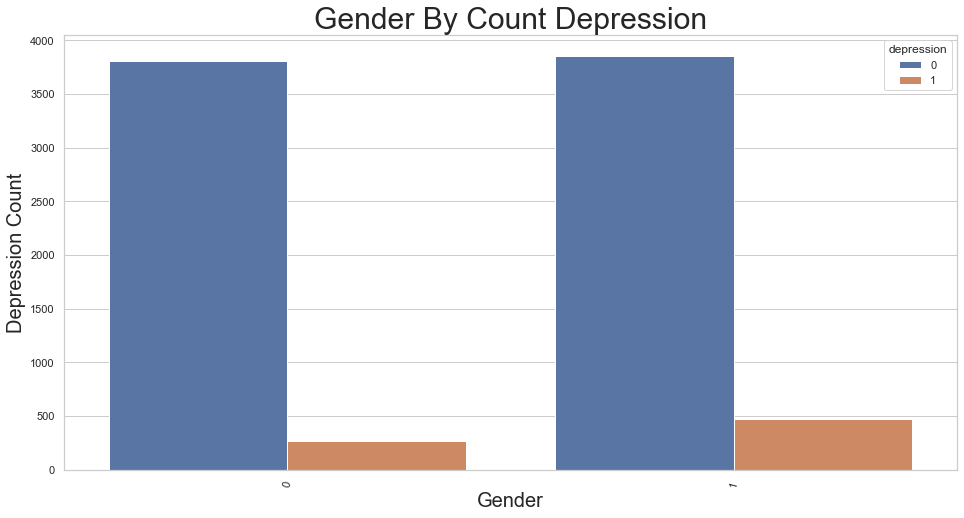

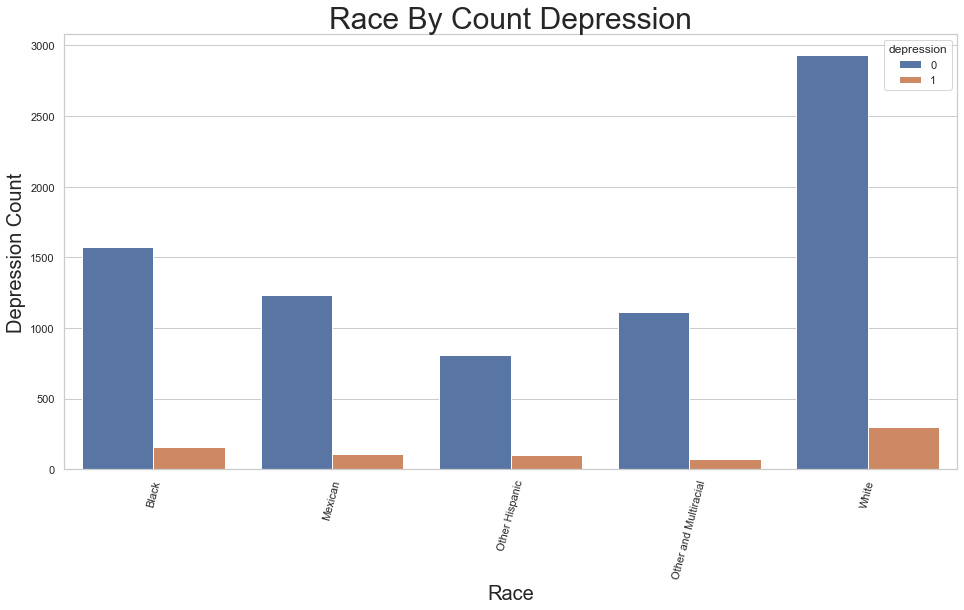

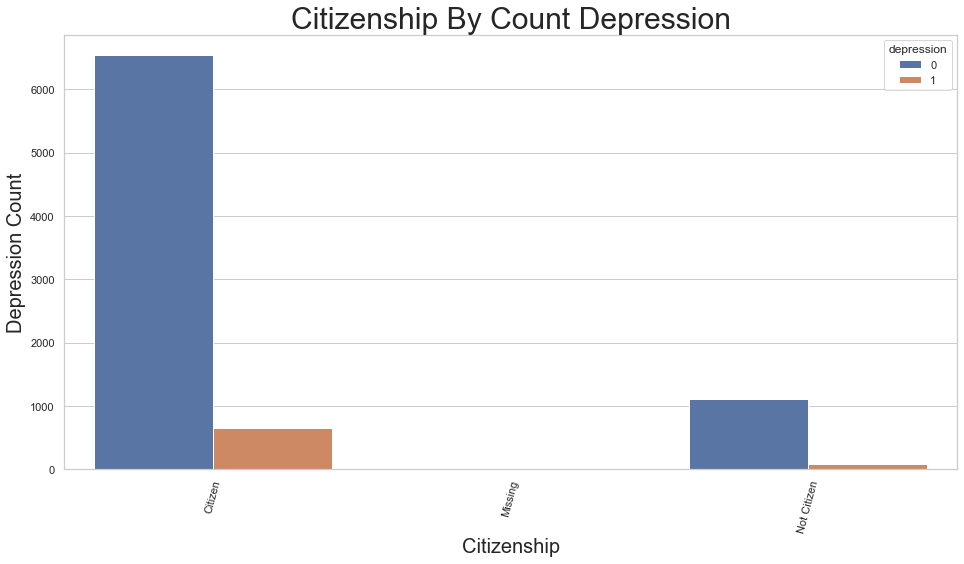

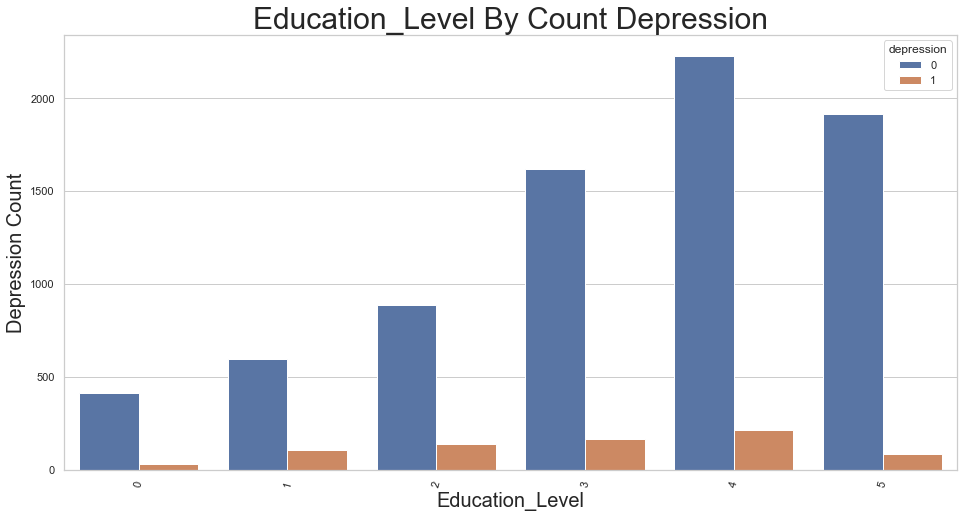

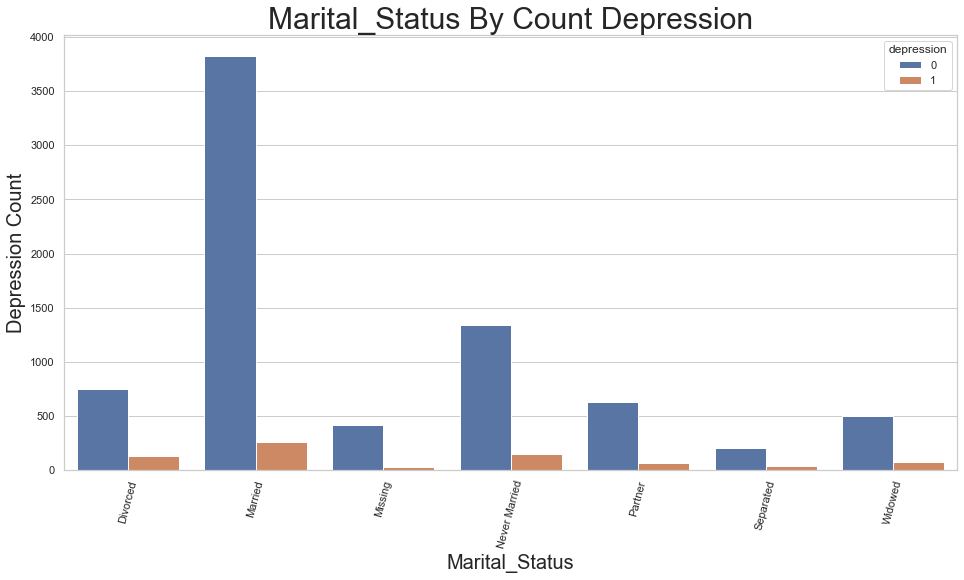

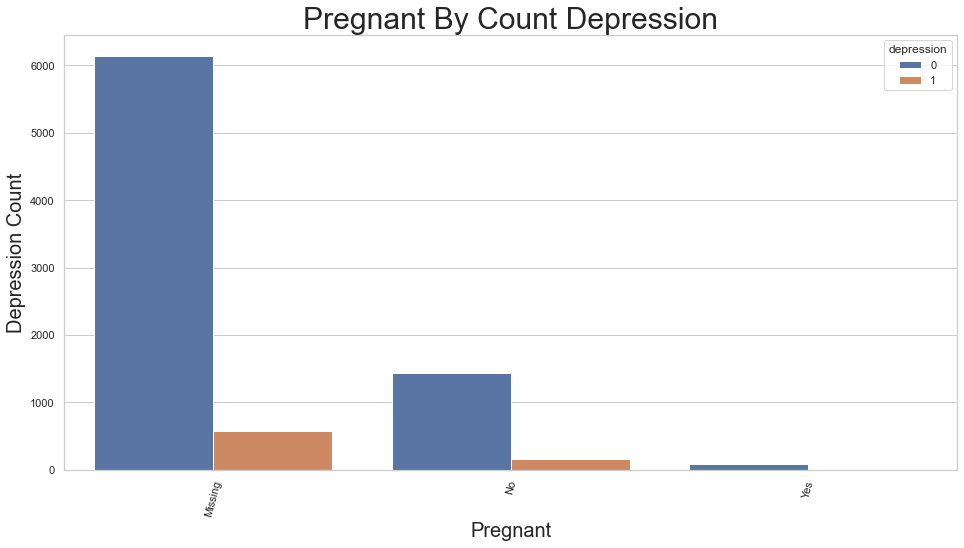

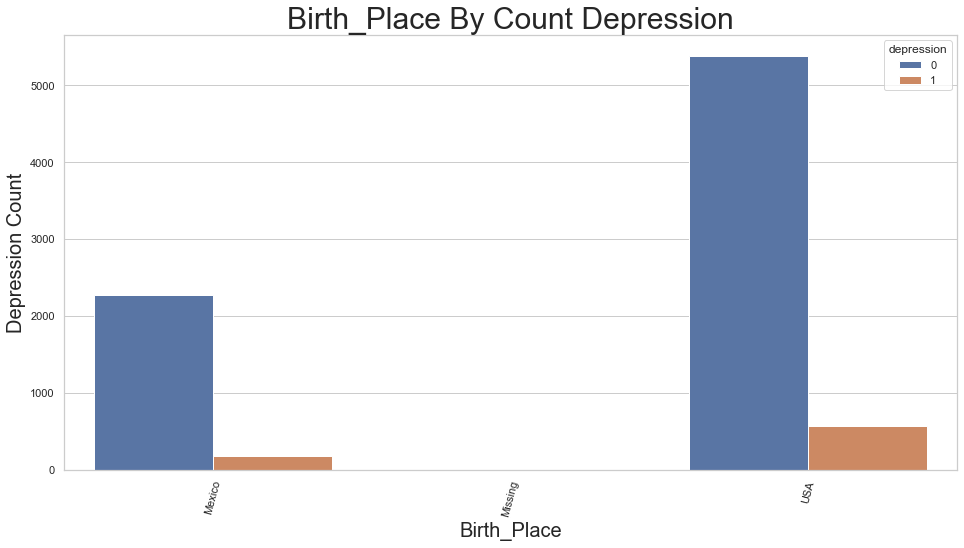

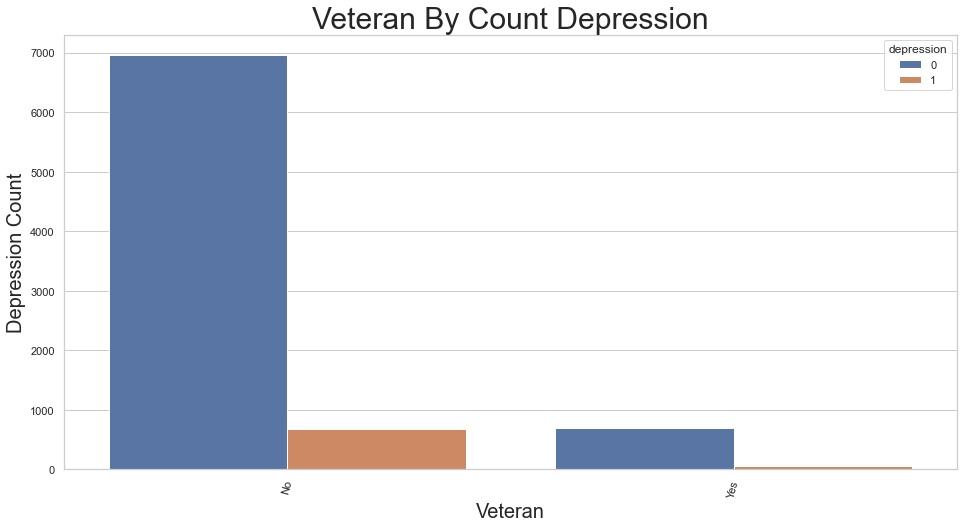

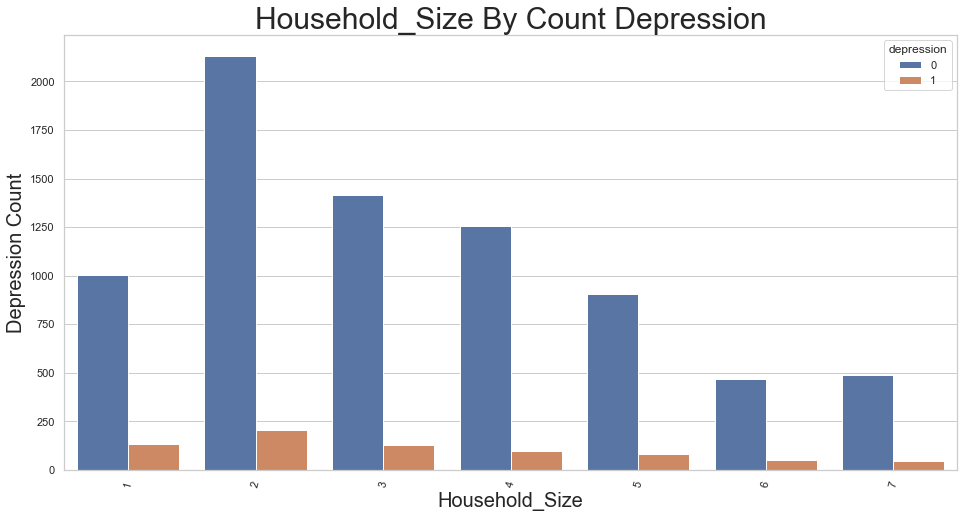

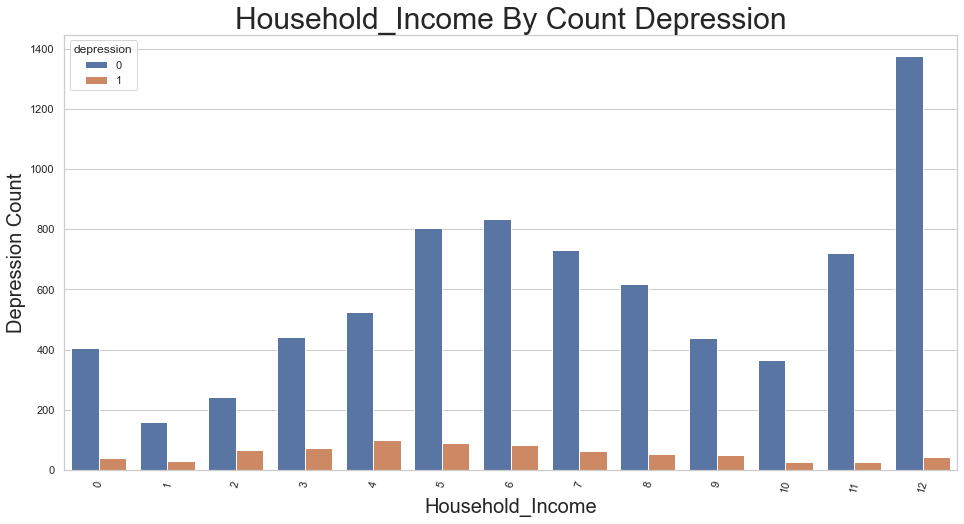

In [153]:
# Plotting the columns
for col in demo_cat_cols:
    pf.plotting_counts(train_df, col)

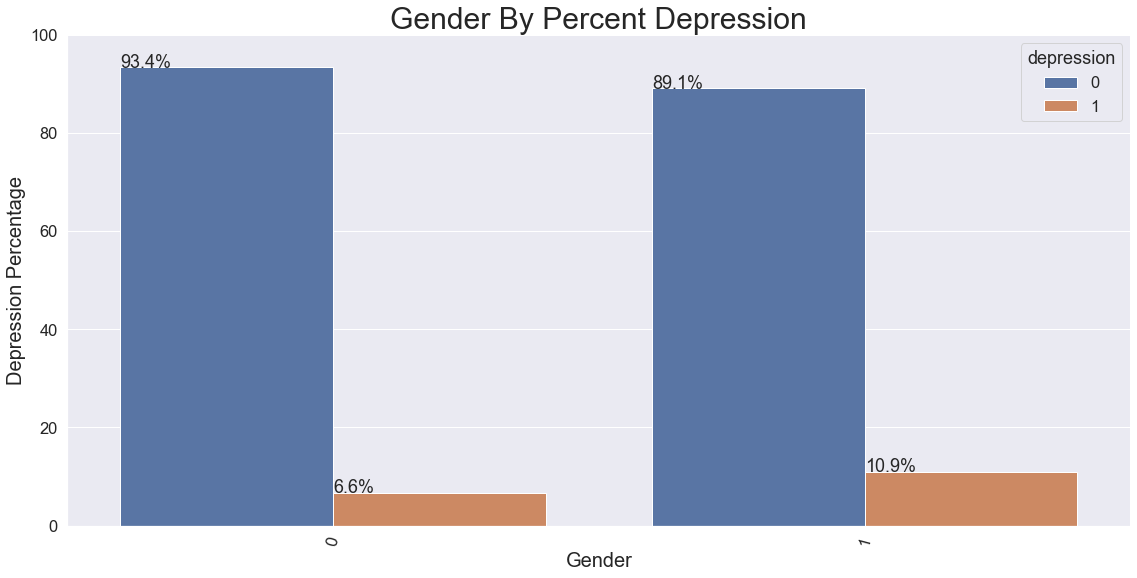

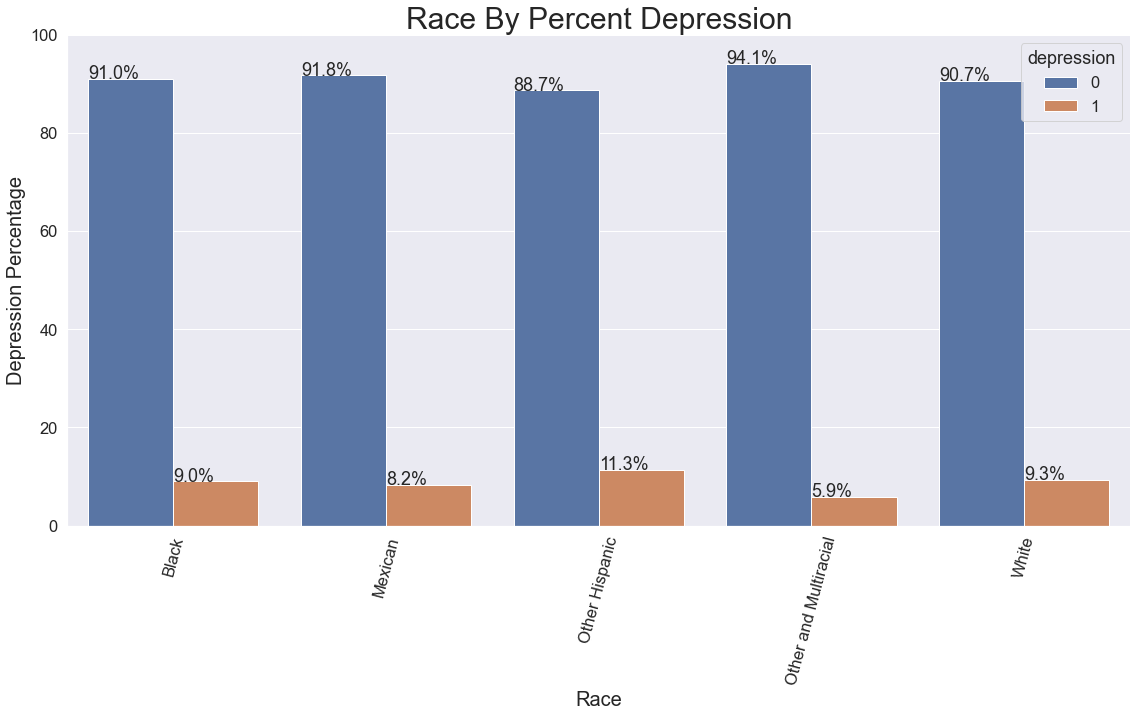

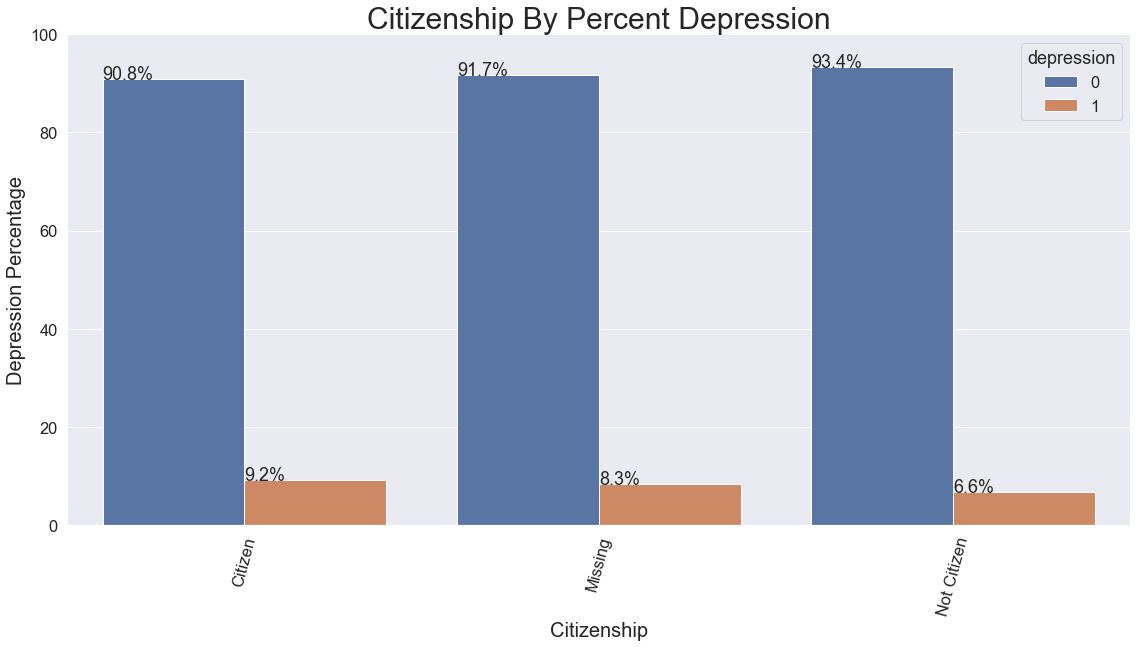

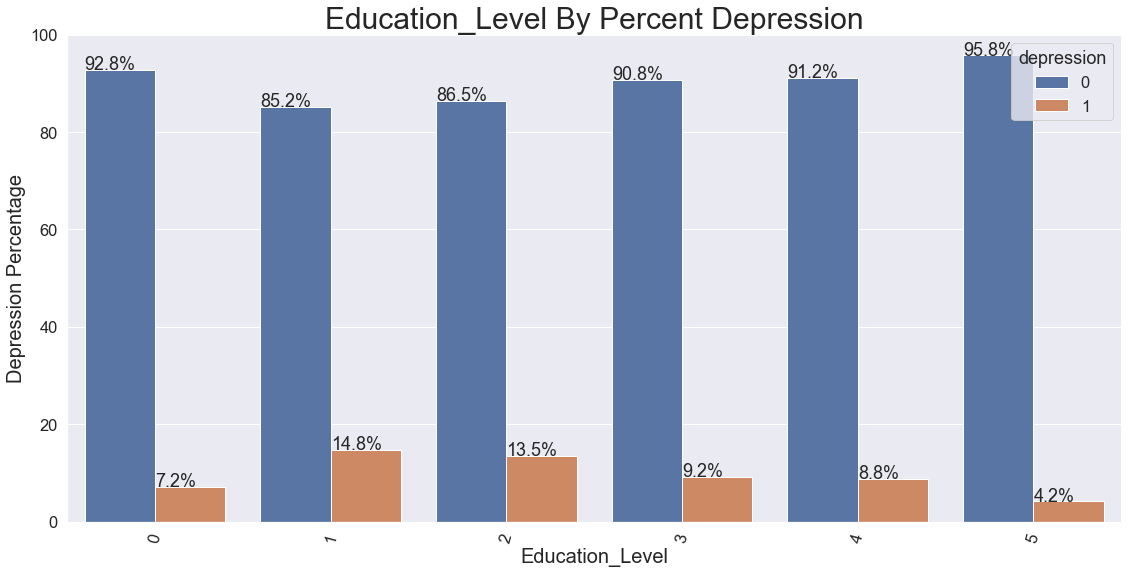

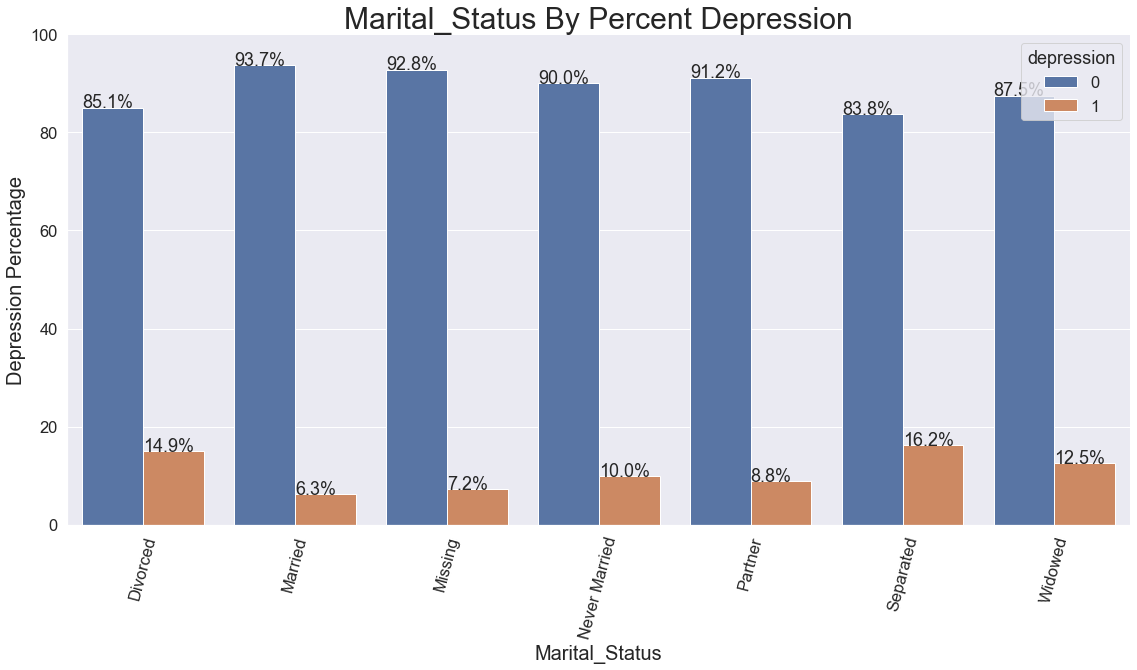

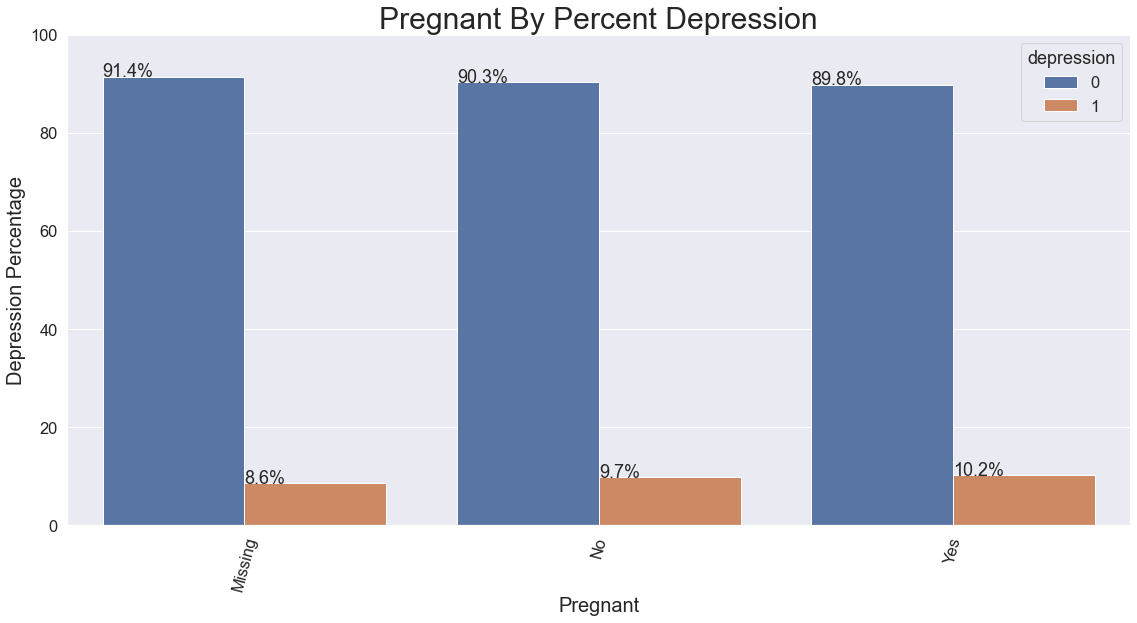

posx and posy should be finite values
posx and posy should be finite values


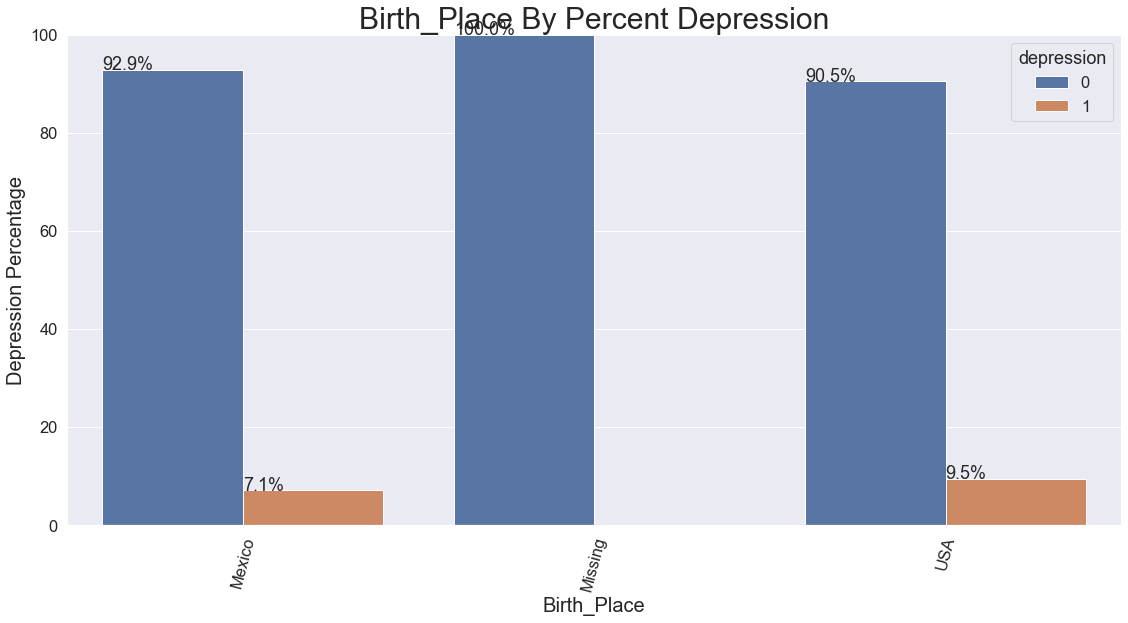

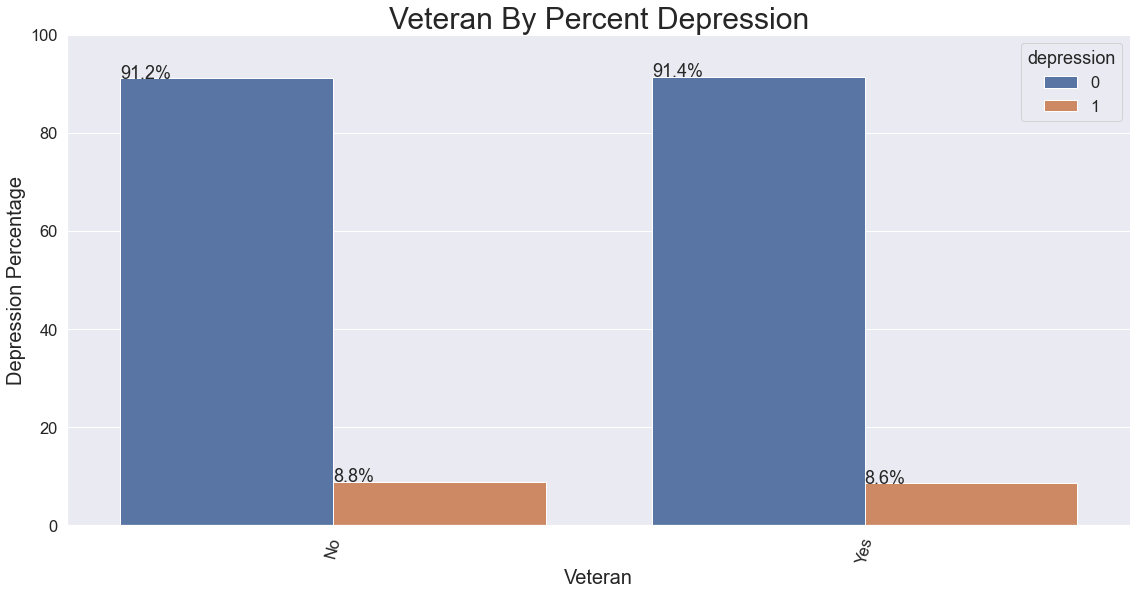

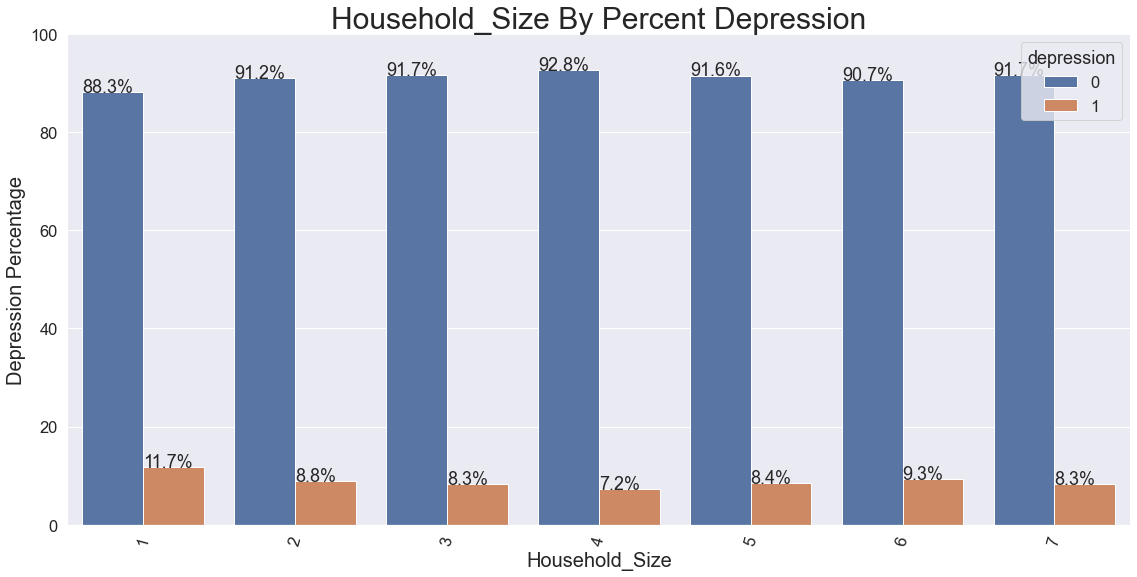

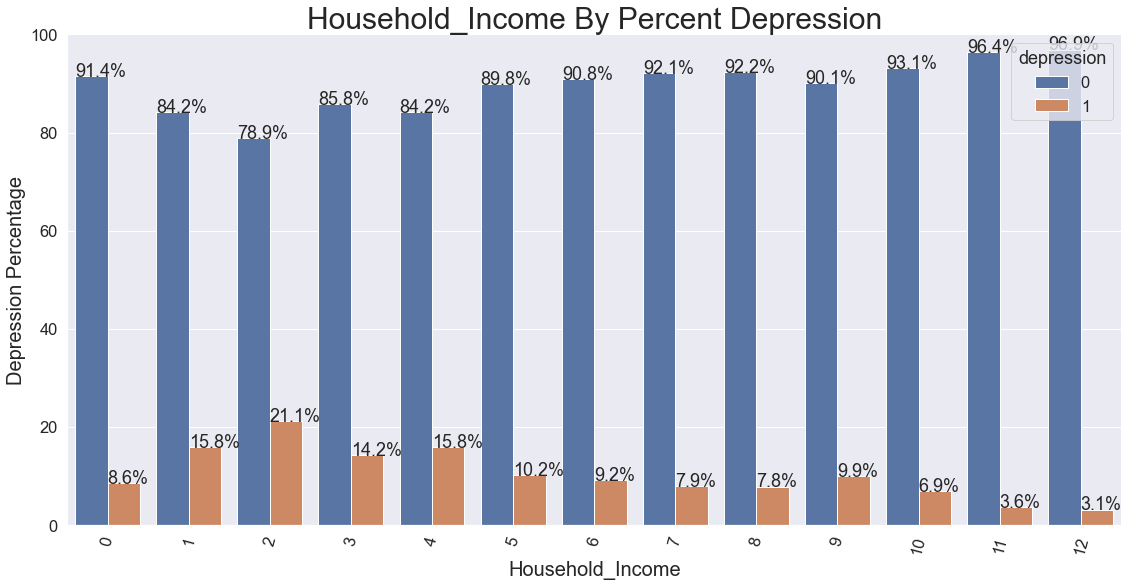

In [154]:
# Plotting the columns
for col in demo_cat_cols:
    pf.plotting_percentages(train_df, col)

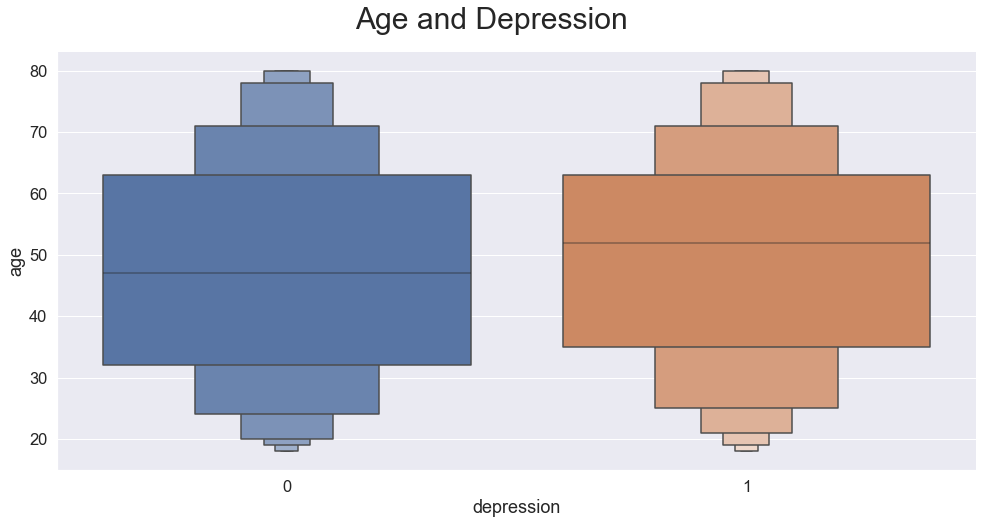

In [155]:
# Plotting the columns
for col in demo_num_cols:
    pf.plot_num_cols(train_df, col)

## Occupation

In [156]:
# Listing the columns
occupation_cat_cols = ['full_time_work', 'work_type', 'out_of_work']

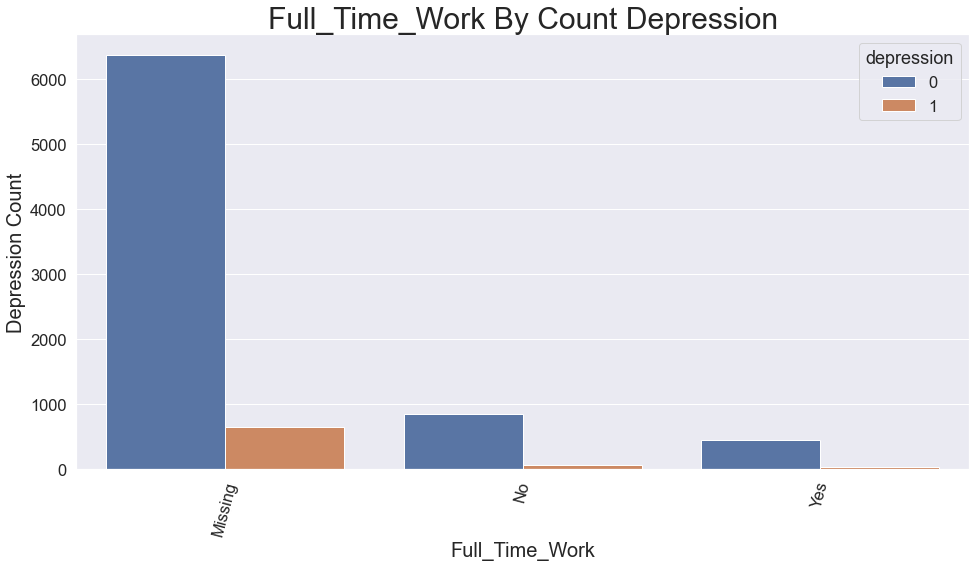

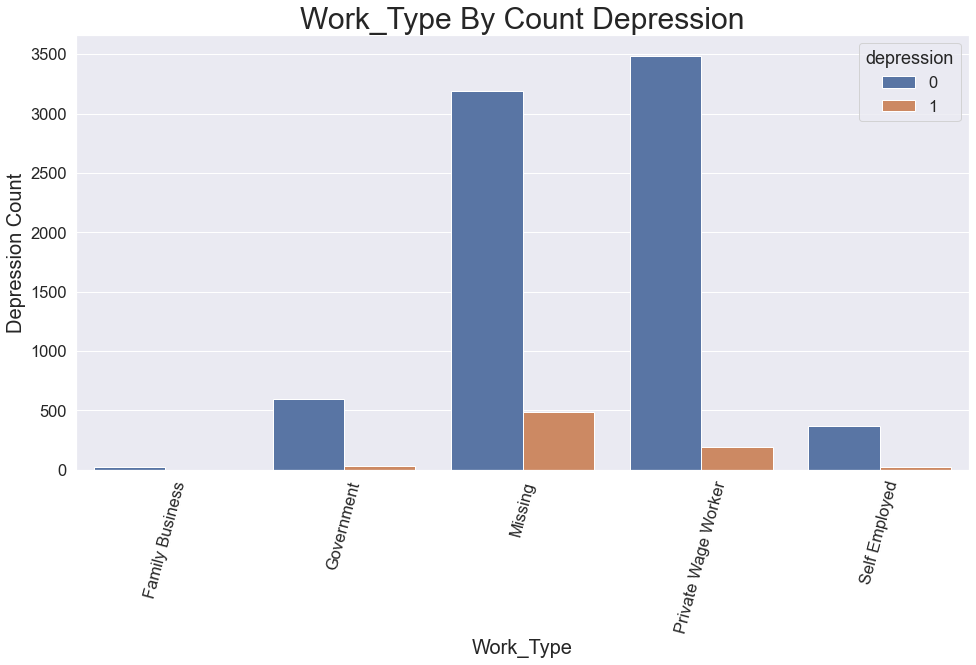

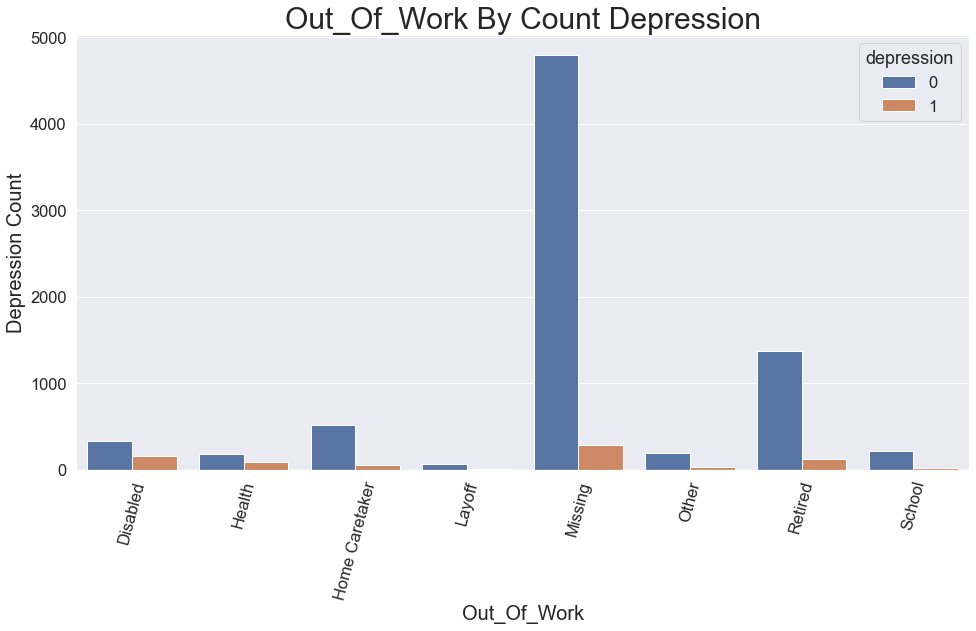

In [157]:
# Plotting the categorical columns
for col in occupation_cat_cols:
    pf.plotting_counts(train_df, col)

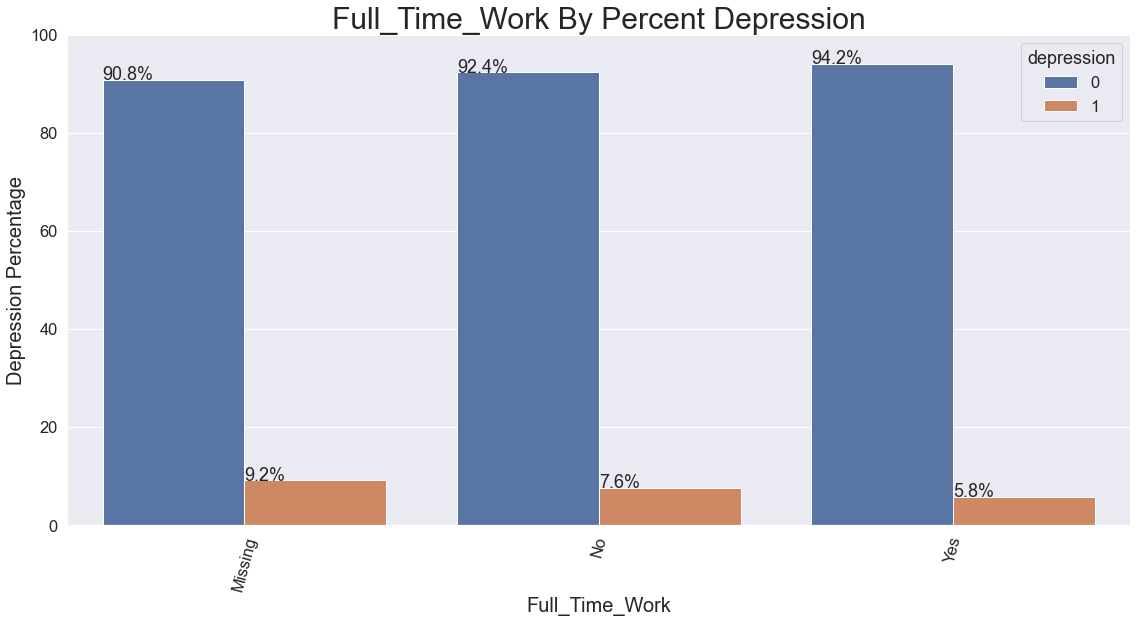

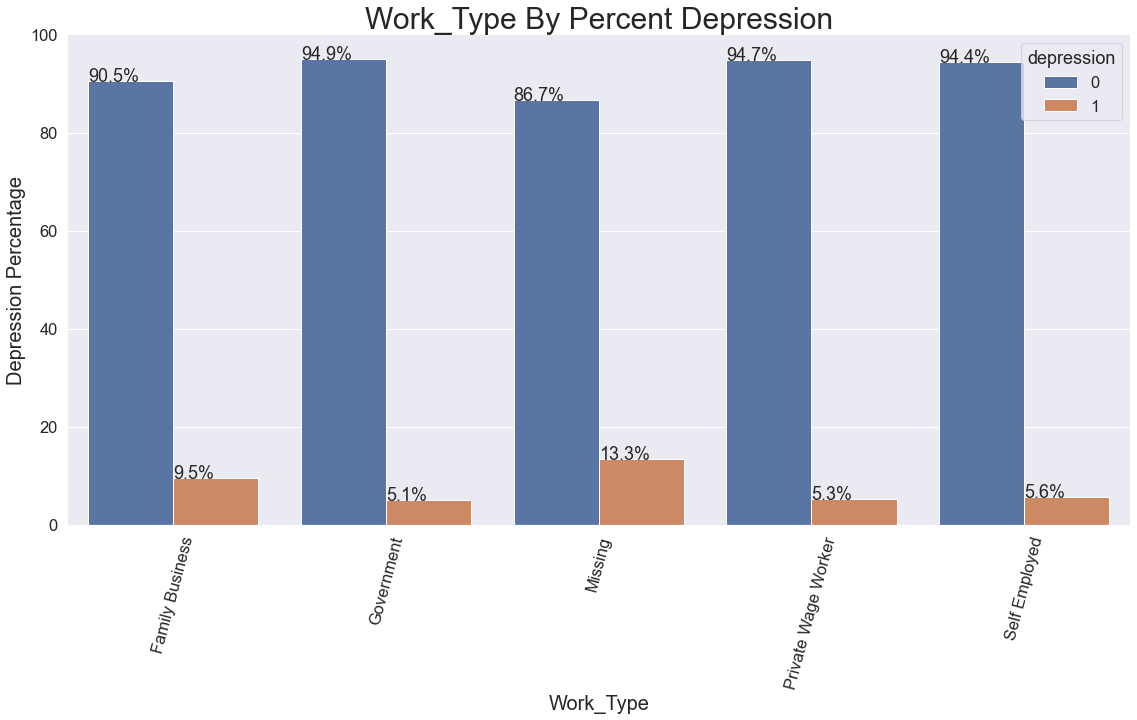

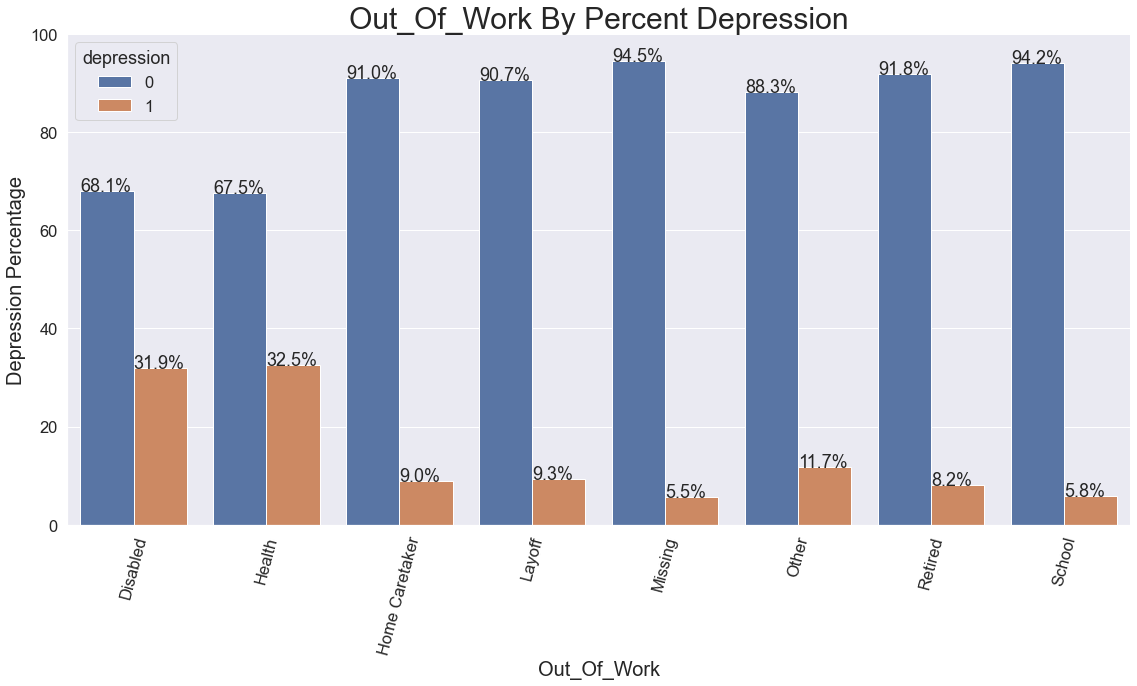

In [158]:
# Plotting the categorical columns
for col in occupation_cat_cols:
    pf.plotting_percentages(train_df, col)

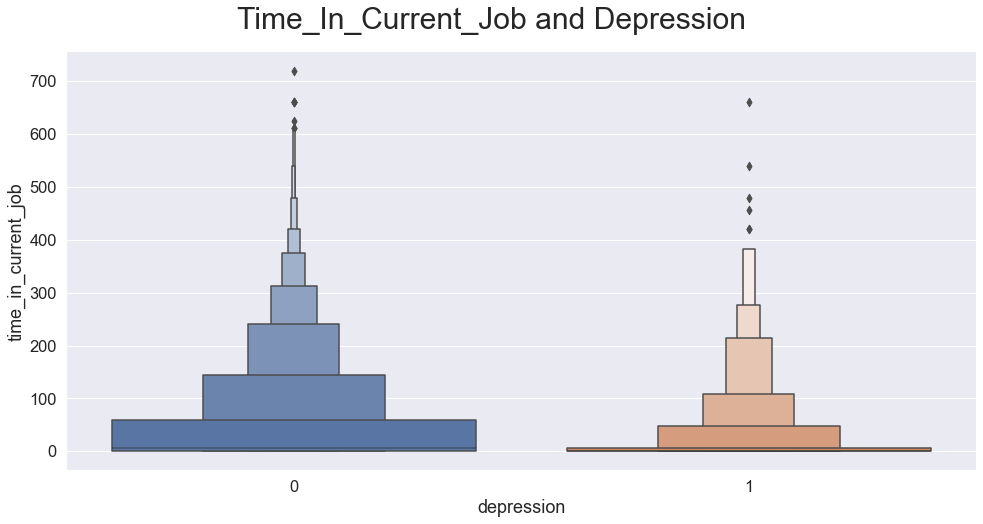

In [159]:
# Plotting the column
pf.plot_num_cols(train_df, 'time_in_current_job')

## Smoking

In [160]:
# Creating separate lists for the category and number columns
smoking_cat_cols = ['current_smoker', 'household_smokers']

smoking_num_cols = ['start_smoking_age', 'previous_cigarettes_per_day',
                   'current_cigarettes_per_day', 'days_quit_smoking']

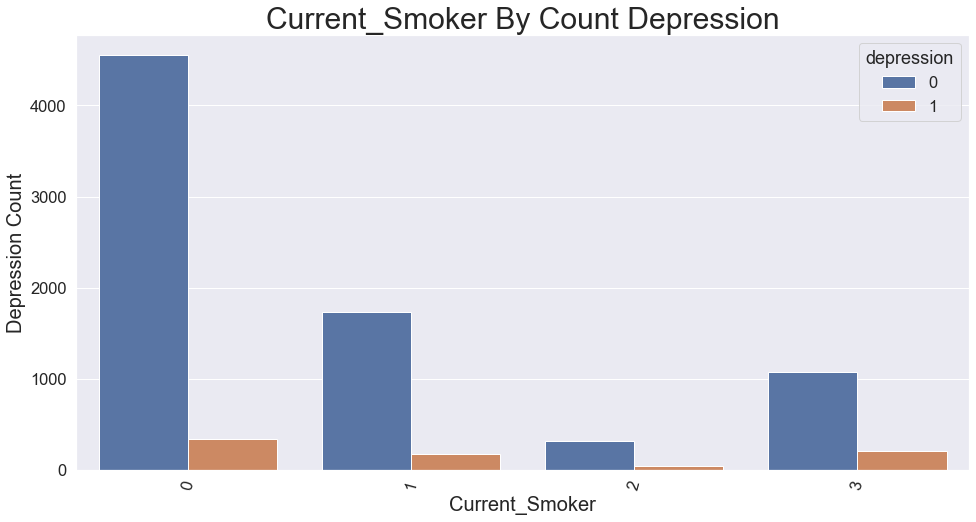

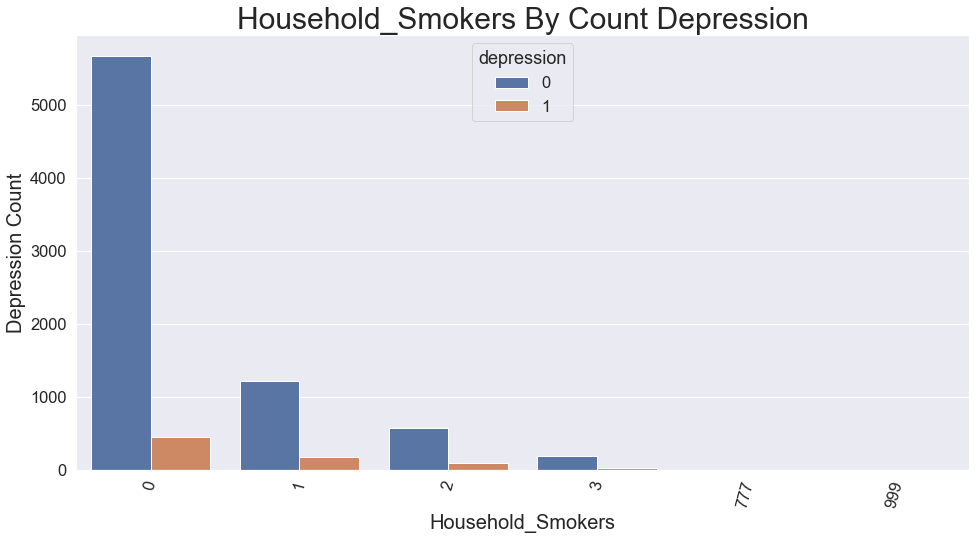

In [161]:
# Plotting the columns
for col in smoking_cat_cols:
    pf.plotting_counts(train_df, col)

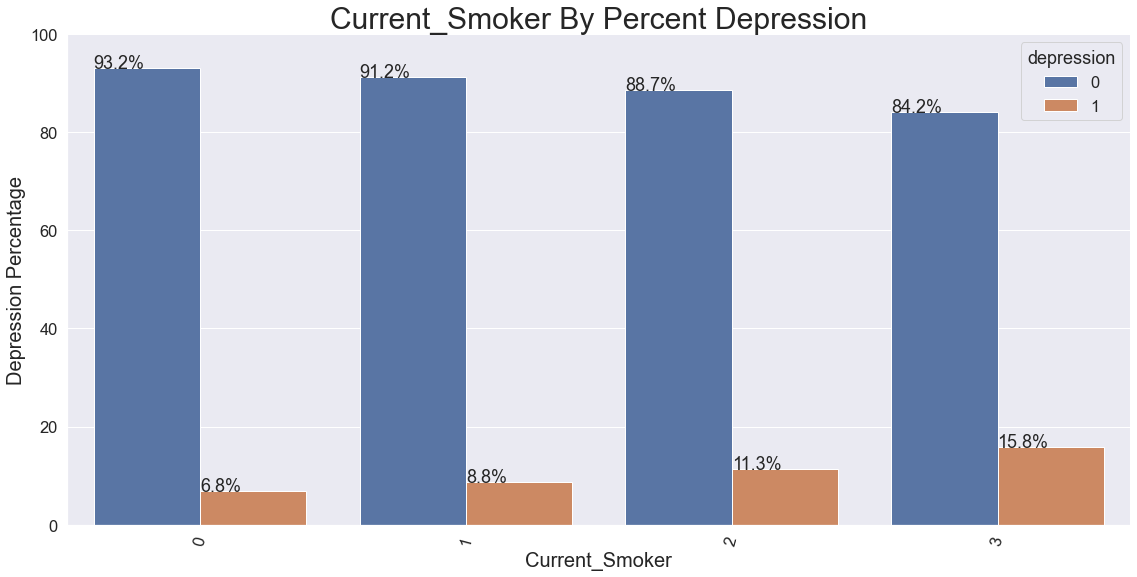

posx and posy should be finite values
posx and posy should be finite values


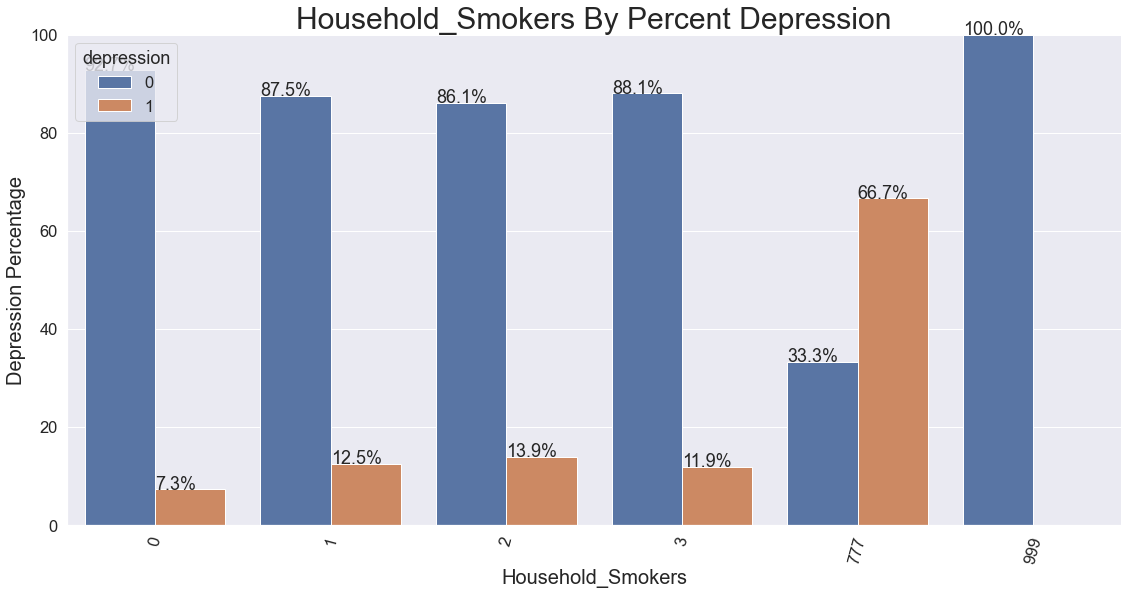

In [162]:
# Plotting the columns
for col in smoking_cat_cols:
    pf.plotting_percentages(train_df, col)

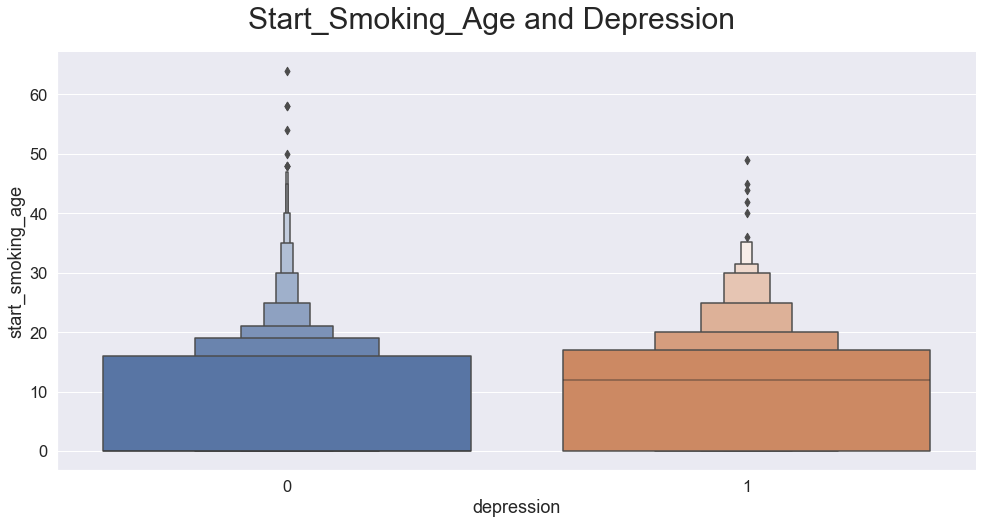

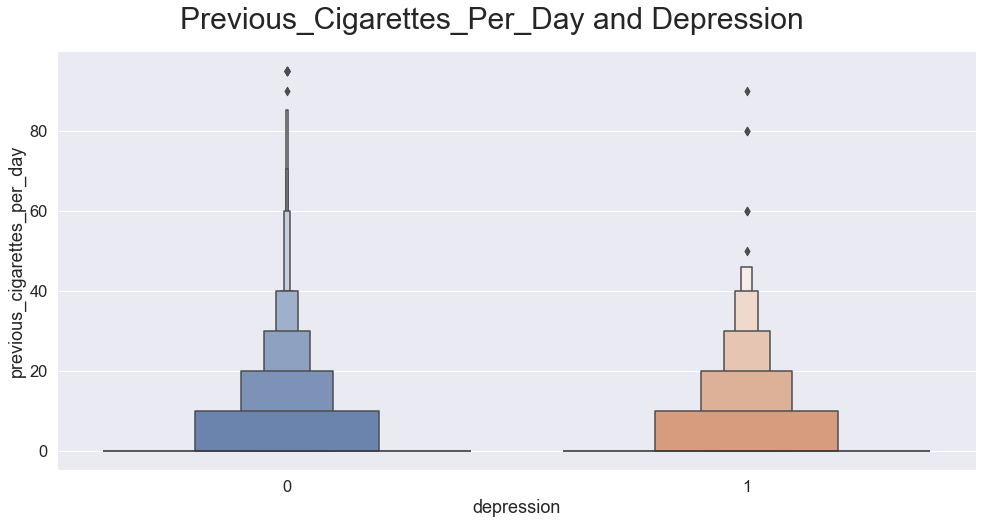

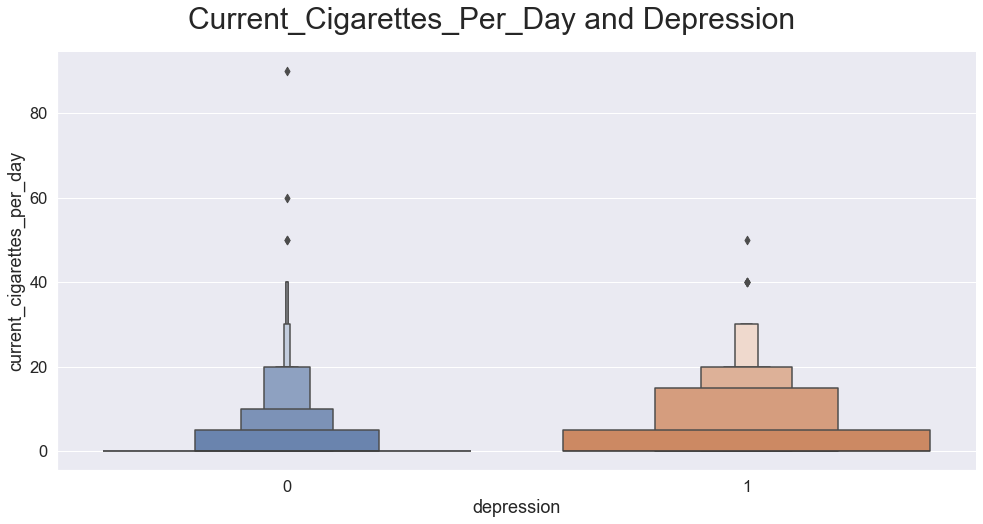

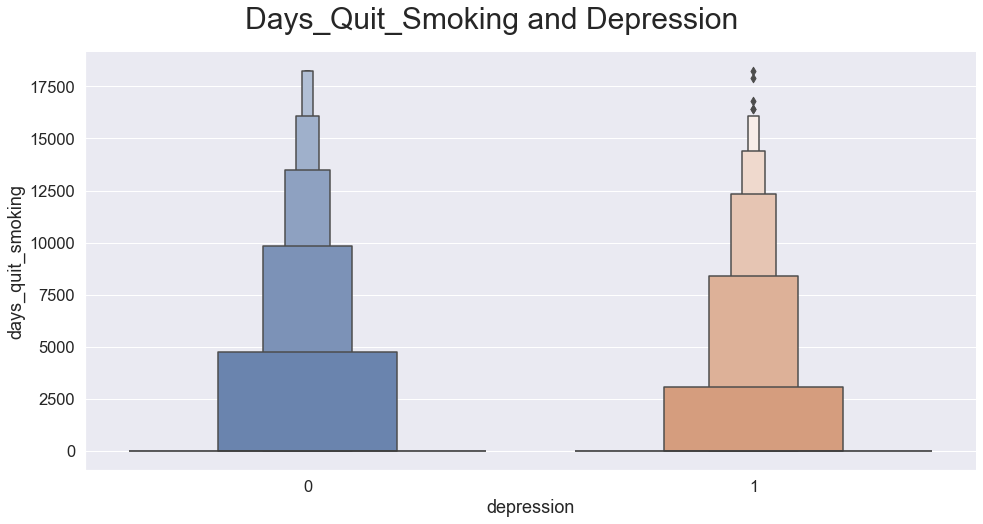

In [163]:
# Plotting the columns
for col in smoking_num_cols:
    pf.plot_num_cols(train_df, col)

# Modeling Preparation

## One Hot Encode

In [164]:
# Create an encoder object
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [165]:
# Selecting the columns to be one hot encoded
ohe_cols = X_train.select_dtypes('O').columns
ohe_cols

Index(['race', 'citizenship', 'marital_status', 'pregnant', 'birth_place',
       'veteran', 'full_time_work', 'work_type', 'out_of_work'],
      dtype='object')

In [166]:
# One hot encoding the categorical columns of the dataframes
ohe_train = encoder.fit_transform(X_train[ohe_cols])
ohe_test = encoder.transform(X_test[ohe_cols])

In [167]:
# Getting the new names of the columns
col_names = encoder.get_feature_names(ohe_cols)

In [168]:
# Turning the encoded columns into dataframes
ohe_train_df = pd.DataFrame(ohe_train, columns=col_names, index=X_train.index)
ohe_test_df = pd.DataFrame(ohe_test, columns=col_names, index=X_test.index)

In [169]:
# Checking the new dataframe
ohe_train_df.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,citizenship_Citizen,citizenship_Missing,citizenship_Not Citizen,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,pregnant_Missing,pregnant_No,pregnant_Yes,birth_place_Mexico,birth_place_Missing,birth_place_USA,veteran_No,veteran_Yes,full_time_work_Missing,full_time_work_No,full_time_work_Yes,work_type_Family Business,work_type_Government,work_type_Missing,work_type_Private Wage Worker,work_type_Self Employed,out_of_work_Disabled,out_of_work_Health,out_of_work_Home Caretaker,out_of_work_Layoff,out_of_work_Missing,out_of_work_Other,out_of_work_Retired,out_of_work_School
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78634,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
88605,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
74563,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
78465,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
75717,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [170]:
# Checking the new dataframe
ohe_test_df.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,citizenship_Citizen,citizenship_Missing,citizenship_Not Citizen,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,pregnant_Missing,pregnant_No,pregnant_Yes,birth_place_Mexico,birth_place_Missing,birth_place_USA,veteran_No,veteran_Yes,full_time_work_Missing,full_time_work_No,full_time_work_Yes,work_type_Family Business,work_type_Government,work_type_Missing,work_type_Private Wage Worker,work_type_Self Employed,out_of_work_Disabled,out_of_work_Health,out_of_work_Home Caretaker,out_of_work_Layoff,out_of_work_Missing,out_of_work_Other,out_of_work_Retired,out_of_work_School
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
74974,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
77373,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
85855,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
89197,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
76648,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


## Scaling

In [171]:
# Listing the nummerical columns
scale_cols = X_train.select_dtypes('number').columns
list(scale_cols)

['gender',
 'age',
 'education_level',
 'household_size',
 'household_income',
 'time_in_current_job',
 'start_smoking_age',
 'current_smoker',
 'previous_cigarettes_per_day',
 'current_cigarettes_per_day',
 'days_quit_smoking',
 'household_smokers']

In [172]:
# Initiating the transformer
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(random_state=123)

In [173]:
# Fitting the transformer
trans_train = transformer.fit_transform(X_train[scale_cols])
trans_test = transformer.transform(X_test[scale_cols])

In [174]:
# Turning the scaled data into dataframes
trans_train_df = pd.DataFrame(trans_train, columns=X_train[scale_cols].columns,
                             index=X_train.index)
trans_test_df = pd.DataFrame(trans_test, columns=X_train[scale_cols].columns,
                             index=X_test.index)

In [175]:
# Checking out the dataframe
trans_train_df.head()

,gender,age,education_level,household_size,household_income,time_in_current_job,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
SEQN,,,,,,,,,,,,
78634,1.000,0.618,0.365,0.000,0.064,0.000,0.985,1.000,0.000,0.918,0.000,0.812
88605,1.000,0.332,0.365,0.906,0.787,0.000,0.000,0.000,0.000,0.000,0.000,0.000
74563,1.000,0.377,0.617,0.678,0.408,0.801,0.661,0.827,0.000,0.829,0.000,0.000
78465,1.000,0.830,0.365,0.506,0.064,0.000,0.638,0.694,0.885,0.000,0.992,0.935
75717,1.000,1.000,0.365,0.000,0.211,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [176]:
# Checking out the dataframe
trans_test_df.head()

,gender,age,education_level,household_size,household_income,time_in_current_job,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
SEQN,,,,,,,,,,,,
74974,0.000,0.507,1.000,1.000,1.000,0.919,0.000,0.000,0.000,0.000,0.000,0.000
77373,1.000,0.904,0.617,0.275,0.598,0.000,0.000,0.000,0.000,0.000,0.000,0.000
85855,0.000,0.734,0.365,0.000,0.142,0.000,0.621,0.827,0.000,0.856,0.000,0.812
89197,1.000,0.490,0.617,0.678,1.000,0.893,0.000,0.000,0.000,0.000,0.000,0.000
76648,1.000,0.904,0.365,0.678,0.301,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [177]:
# Combining the one hot encoded and scaled data back together
X_train_tf = pd.concat([ohe_train_df, trans_train_df], axis=1)
X_test_tf = pd.concat([ohe_test_df, trans_test_df], axis=1)

In [178]:
# Checking out the dataframe
X_train_tf.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,citizenship_Citizen,citizenship_Missing,citizenship_Not Citizen,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,pregnant_Missing,pregnant_No,pregnant_Yes,birth_place_Mexico,birth_place_Missing,birth_place_USA,veteran_No,veteran_Yes,full_time_work_Missing,full_time_work_No,full_time_work_Yes,work_type_Family Business,work_type_Government,work_type_Missing,work_type_Private Wage Worker,work_type_Self Employed,out_of_work_Disabled,out_of_work_Health,out_of_work_Home Caretaker,out_of_work_Layoff,out_of_work_Missing,out_of_work_Other,out_of_work_Retired,out_of_work_School,gender,age,education_level,household_size,household_income,time_in_current_job,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78634,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.618,0.365,0.000,0.064,0.000,0.985,1.000,0.000,0.918,0.000,0.812
88605,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.332,0.365,0.906,0.787,0.000,0.000,0.000,0.000,0.000,0.000,0.000
74563,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.377,0.617,0.678,0.408,0.801,0.661,0.827,0.000,0.829,0.000,0.000
78465,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.830,0.365,0.506,0.064,0.000,0.638,0.694,0.885,0.000,0.992,0.935
75717,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.365,0.000,0.211,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [179]:
# Checking out the dataframe
X_test_tf.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,citizenship_Citizen,citizenship_Missing,citizenship_Not Citizen,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,pregnant_Missing,pregnant_No,pregnant_Yes,birth_place_Mexico,birth_place_Missing,birth_place_USA,veteran_No,veteran_Yes,full_time_work_Missing,full_time_work_No,full_time_work_Yes,work_type_Family Business,work_type_Government,work_type_Missing,work_type_Private Wage Worker,work_type_Self Employed,out_of_work_Disabled,out_of_work_Health,out_of_work_Home Caretaker,out_of_work_Layoff,out_of_work_Missing,out_of_work_Other,out_of_work_Retired,out_of_work_School,gender,age,education_level,household_size,household_income,time_in_current_job,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
74974,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.507,1.000,1.000,1.000,0.919,0.000,0.000,0.000,0.000,0.000,0.000
77373,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.904,0.617,0.275,0.598,0.000,0.000,0.000,0.000,0.000,0.000,0.000
85855,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.734,0.365,0.000,0.142,0.000,0.621,0.827,0.000,0.856,0.000,0.812
89197,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.490,0.617,0.678,1.000,0.893,0.000,0.000,0.000,0.000,0.000,0.000
76648,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.904,0.365,0.678,0.301,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## KMeans Clustering

In [180]:
# Importing packages
from sklearn.cluster import KMeans
from sklearn import metrics

In [181]:
# Initiating a range of clusters to try
k_range = range(2,16)

# Creating empty lists to store results
cal_har_score= []
inertia = []
sil_score = []

# Fitting a KMeans model to the data with a cluster size for each number
for k in k_range:
    model = KMeans(n_clusters=k, random_state=123, n_jobs=-1)
    model.fit(X_train_tf)

#   Creating predictions, calculating the different scores, and appending to 
#    the lists
    preds = pd.Series(model.predict(X_train_tf))
    cal_har_score.append(metrics.calinski_harabasz_score(X_train_tf,preds))
    sil_score.append(metrics.silhouette_score(X_train_tf, preds, 
                                              random_state=123))
    inertia.append(model.inertia_)

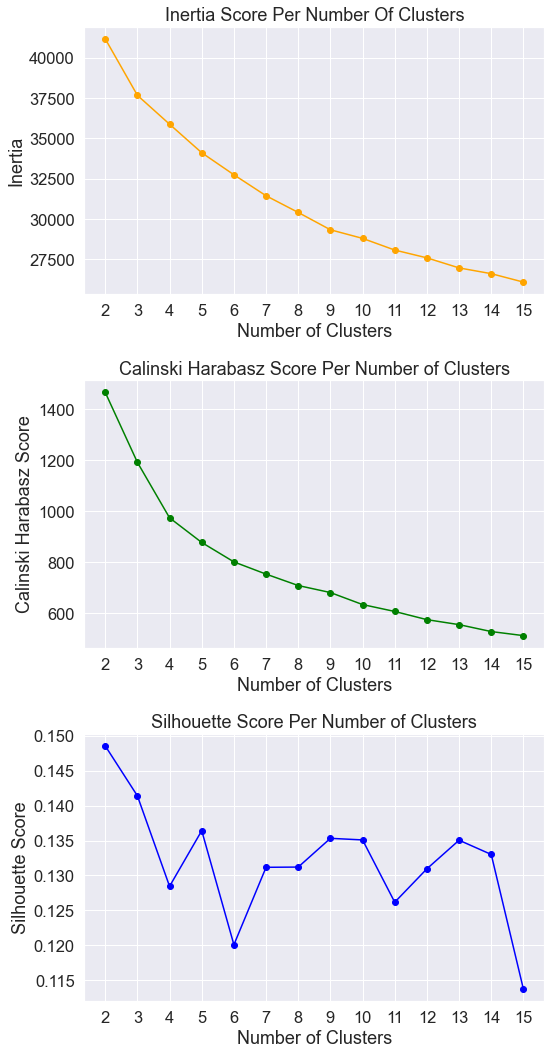

In [182]:
# Creating plots
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(8,15),nrows=3)

# The first plot is the inertia per number of clusters
ax1.plot(k_range, inertia, '-o', color='orange')
ax1.set(xlabel='Number of Clusters', ylabel = 'Inertia')
ax1.set_xticks(k_range)
ax1.set_title('Inertia Score Per Number Of Clusters')

# The second plot is the Calinski Harabasz score per number of clusters
ax2.plot(k_range, cal_har_score, '-o', color='green')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Calinski Harabasz Score')
ax2.set_xticks(k_range)
ax2.set_title('Calinski Harabasz Score Per Number of Clusters')

# The third plot is the silhouette score per number of clusters
ax3.plot(k_range, sil_score, '-o', color='blue')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Silhouette Score')
ax3.set_title('Silhouette Score Per Number of Clusters')
ax3.set_xticks(k_range)
fig.tight_layout()

In [183]:
# Fitting 5 clusters onto the training data
k_clusters = 6
k_model = KMeans(k_clusters, random_state=123, n_jobs=-1)
k_model.fit(X_train_tf)

# Creating predictions for the training data
kmeans_train_preds = k_model.predict(X_train_tf)
kmeans_train = pd.Series(kmeans_train_preds, index=X_train_tf.index, 
                         name='Cluster')

# Creating predictions for the test data
kmeans_test_preds = k_model.predict(X_test_tf)
kmeans_test = pd.Series(kmeans_test_preds, index=X_test_tf.index, 
                        name='Cluster')

In [184]:
# Looking at the percent spread of the clusters
kmeans_train.value_counts(1)

2   0.226
0   0.173
4   0.165
3   0.165
1   0.161
5   0.111
Name: Cluster, dtype: float64

In [185]:
# Looking at the percent spread of the clusters
kmeans_test.value_counts(1)

2   0.239
0   0.164
1   0.164
4   0.164
3   0.162
5   0.108
Name: Cluster, dtype: float64

In [186]:
# Looking atthe head of the series
kmeans_train.head()

SEQN
78634    4
88605    5
74563    3
78465    4
75717    1
Name: Cluster, dtype: int32

In [187]:
# Combining the clusters with the rest of the data
X_train_final = pd.concat([X_train_tf, kmeans_train], axis=1)
X_test_final = pd.concat([X_test_tf, kmeans_test], axis=1)

In [188]:
# Checking out the dataframe
X_train_final.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,citizenship_Citizen,citizenship_Missing,citizenship_Not Citizen,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,pregnant_Missing,pregnant_No,pregnant_Yes,birth_place_Mexico,birth_place_Missing,birth_place_USA,veteran_No,veteran_Yes,full_time_work_Missing,full_time_work_No,full_time_work_Yes,work_type_Family Business,work_type_Government,work_type_Missing,work_type_Private Wage Worker,work_type_Self Employed,out_of_work_Disabled,out_of_work_Health,out_of_work_Home Caretaker,out_of_work_Layoff,out_of_work_Missing,out_of_work_Other,out_of_work_Retired,out_of_work_School,gender,age,education_level,household_size,household_income,time_in_current_job,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers,Cluster
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78634,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.618,0.365,0.000,0.064,0.000,0.985,1.000,0.000,0.918,0.000,0.812,4
88605,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.332,0.365,0.906,0.787,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5
74563,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.377,0.617,0.678,0.408,0.801,0.661,0.827,0.000,0.829,0.000,0.000,3
78465,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.830,0.365,0.506,0.064,0.000,0.638,0.694,0.885,0.000,0.992,0.935,4
75717,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.365,0.000,0.211,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1


In [189]:
# Checking out the dataframe
X_test_final.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,citizenship_Citizen,citizenship_Missing,citizenship_Not Citizen,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,pregnant_Missing,pregnant_No,pregnant_Yes,birth_place_Mexico,birth_place_Missing,birth_place_USA,veteran_No,veteran_Yes,full_time_work_Missing,full_time_work_No,full_time_work_Yes,work_type_Family Business,work_type_Government,work_type_Missing,work_type_Private Wage Worker,work_type_Self Employed,out_of_work_Disabled,out_of_work_Health,out_of_work_Home Caretaker,out_of_work_Layoff,out_of_work_Missing,out_of_work_Other,out_of_work_Retired,out_of_work_School,gender,age,education_level,household_size,household_income,time_in_current_job,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers,Cluster
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
74974,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.507,1.000,1.000,1.000,0.919,0.000,0.000,0.000,0.000,0.000,0.000,0
77373,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.904,0.617,0.275,0.598,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
85855,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.734,0.365,0.000,0.142,0.000,0.621,0.827,0.000,0.856,0.000,0.812,4
89197,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.490,0.617,0.678,1.000,0.893,0.000,0.000,0.000,0.000,0.000,0.000,0
76648,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.904,0.365,0.678,0.301,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1


In [191]:
# Creating a full dataframe for plotting
clustering_df = pd.concat([X_train_final, y_train_df], axis=1)

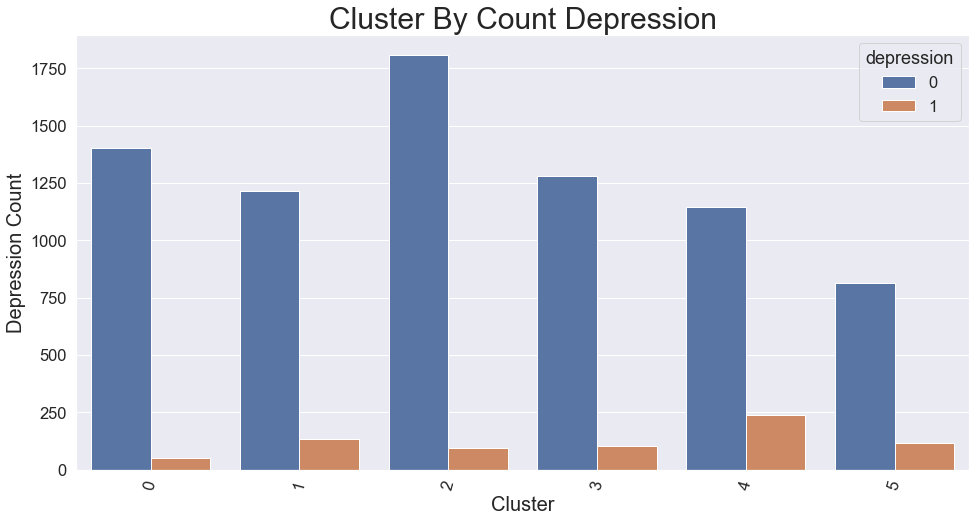

In [192]:
# Plotting the clusters vs target
pf.plotting_counts(clustering_df, 'Cluster');

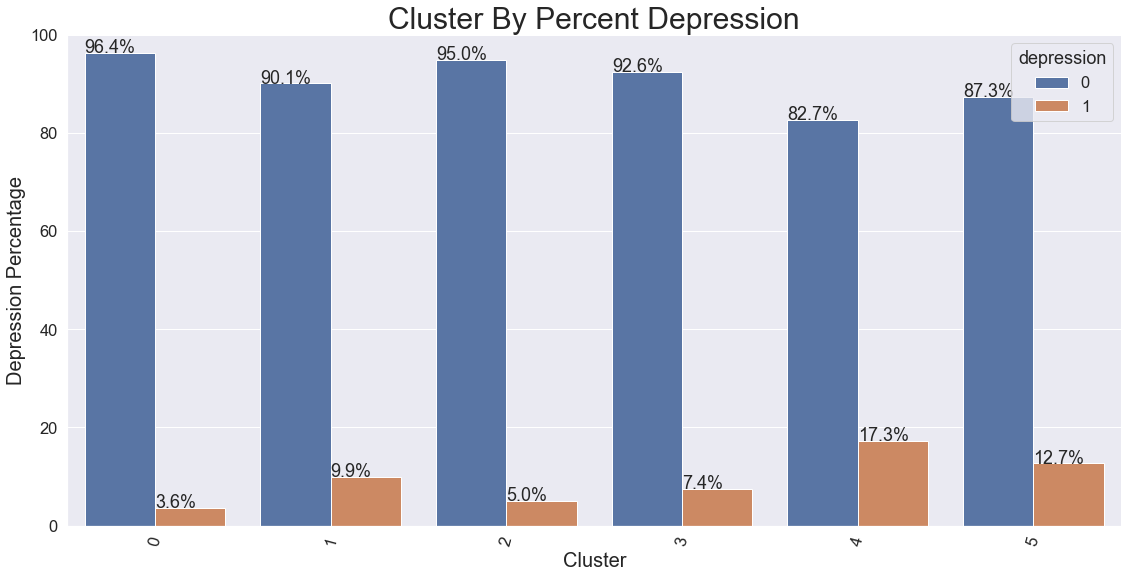

In [193]:
# Plotting the clusters vs target
pf.plotting_percentages(clustering_df, 'Cluster');

## Model Evaluation

In [194]:
# Looking at the custom function for making a classification report
func = inspect.getsource(pf.make_classification_report)
display(Markdown("```python\n"+func+"\n```"))

```python
def make_classification_report(model, y_true, x_test, title=''):
    
    '''
    Generate and return the classification report for a model.
    
    Args: 
        Model (classification model): SKlearn compatable model.
        y_true (series or array): True labels to compare predictions
        x_test (dataframe or array): X data to generate predictions for
        title (str): Title for the report
        
    Returns:
        Dictionary of the classification results
    
    Example:
        make_classification_report(logreg_model, y_test, X_test, 
                                    title='Logistic Regression Model')
        
        '''
    # Generate predictions
    y_preds = model.predict(x_test)
    print('__________________________________________________________________')
    print(f'CLASSIFICATION REPORT FOR: \n\t{title}')
    print('__________________________________________________________________')
    print('\n')
    
    # Generate report
    report = metrics.classification_report(y_true, y_preds, 
                                target_names=['not depressed', 'depressed'])
    report_dict = metrics.classification_report(y_true, y_preds, 
                                                output_dict=True,
                             target_names=['not depressed', 'depressed'])
    
    # Add the title to the report dictionary
    report_dict['title'] = title
    print(report)
    print('__________________________________________________________________')
    
    return report_dict

```

In [195]:
# Looking at the custom function for plotting a confusion matrix
func = inspect.getsource(pf.plot_confusion_matrix)
display(Markdown("```python\n"+func+"\n```"))

```python
def plot_confusion_matrix(model, X, y, title=''):
    '''
    Plots the normalized confusion matrix for a model
    
    Args:
        Model (classification model): SKlearn compatable model
        X (dataframe or array): feature columns of a dataframe
        y (series or array): target column of a dataframe
        title (str): Title for the matrix
    
    Returns:
        Plotted figure of the confusion matrix for the model
    
    Example:
        plot_confusion_matrix(logreg_model, X_test, y_test, 
        title='Logistic Regression Model')
    '''
    
    # Plot the matrix with labels    
    fig = metrics.plot_confusion_matrix(model, X, y, normalize='true', 
                                        cmap='Greens',
                                 display_labels=['not depressed', 'depressed']) 

    # Remove grid lines
    plt.grid(False)
    
    # Set title
    plt.title(f'Confusion Matrix For {title}', fontdict={'fontsize':17})
    plt.show()
    print('__________________________________________________________________')
    return fig

```

In [196]:
# Looking at the custom function for plotting an ROC curve
func = inspect.getsource(pf.plot_roc_curve)
display(Markdown("```python\n"+func+"\n```"))

```python
def plot_roc_curve(model, xtest, ytest, title=''):
    '''
    Plots the precision-recall curve for a model
    
    Args:
        Model (classification model): SKlearn compatable model
        xtest (dataframe or array): feature columns of the test set
        ytest (series or array): target column of the test set
        
    Returns:
        Plotted figure of ROC curve for the model
    
    Example:
        plot_roc_curve(classification_model, X_test, y_test)
    '''
    # Creating the plot
    fig, ax = plt.subplots(figsize=(8,6), ncols=1)
    roc_plot = metrics.plot_roc_curve(model, xtest, ytest, ax=ax)

    # Setting the title of the plot
    ax.set_title(f'ROC Curve For {title}', 
                 fontdict={'fontsize':17})

    # Setting a legend for the plot
    ax.legend()
    plt.show();
    
    return fig

```

In [197]:
# Looking at the custom function to display top features from tree models
func = inspect.getsource(pf.plot_top_features)
display(Markdown("```python\n"+func+"\n```"))

```python
def plot_top_features(model, xtrain, title=''):
    '''
    Plots the top important features of a tree based model
    
    Args:
        Model (classification model): SKlearn compatable model
        xtrain (dataframe or array): feature columns for the training set
        title (str): Title for the plot
        
    Returns:
        Plotted figure of feature importances for the model
    
    Example:
        plot_top_features(rf_model, X_train, title='Random Forest Model')
    '''

    # Turn the feature importances into a series 
    importances = pd.Series(model.feature_importances_, index=xtrain.columns)
    
    # Plot the top most important features
    importances.nlargest(20).sort_values().plot(kind='barh')
    plt.title(f'Most Important Features For {title}', fontdict={'fontsize':17})
    plt.xlabel('Importance')
    return importances.sort_values(ascending=False)

```

In [198]:
# Looking at the custom function that will run all the evaluation functions
func = inspect.getsource(pf.evaluate_model)
display(Markdown("```python\n"+func+"\n```"))

```python
def evaluate_model(model, xtrain, xtest, ytest, tree=False, title=''):
    '''
    Runs all the evaluation functions on a model including the classification 
    report, confusion matrix, ROC plot, and a top features plot if the 
    model is tree based.
    
    Args:
        model (classification model): SKlearn compatable model
        xtrain (dataframe or array): feature columns of the training set
        xtest (dataframe or array): feature columns of the test set
        ytest (series or array): target column of the test set
        tree (boolean): if the model is tree based or not
        title (str): Title for the model
    
    Returns:
        The classification report, confusion matrix, precision recall plot, and 
        top features plot if tree=True
    
    Example:
        evaluate_model(logreg_model, X_train, X_test, y_test,
                        title='Logistic Regression Model')
        
    '''
    
    make_classification_report(model, ytest, xtest, title=title)
    plot_confusion_matrix(model, xtest, ytest, title=title)
    plot_roc_curve(model, xtest, ytest, title=title)
    
    # Feature importance can only be run on tree based models
    if tree:
        plot_top_features(model, xtrain, title=title)

```

In [199]:
# Making a scorer that will score models based on an F score with a more 
# heavily weighted recall
from sklearn.metrics import fbeta_score, make_scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

## Dummy Model

In [200]:
# Fitting a dummy classifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='stratified', random_state=123)
dummy_clf.fit(X_train_final, y_train)

DummyClassifier(random_state=123, strategy='stratified')

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Dummy Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.92      0.91      0.91      1917
    depressed       0.13      0.14      0.13       185

     accuracy                           0.84      2102
    macro avg       0.52      0.52      0.52      2102
 weighted avg       0.85      0.84      0.84      2102

__________________________________________________________________


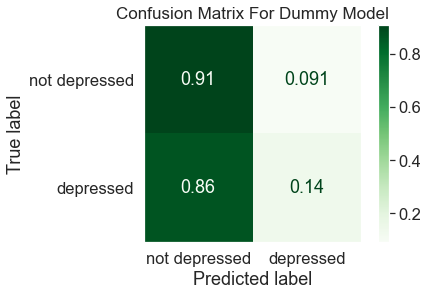

__________________________________________________________________


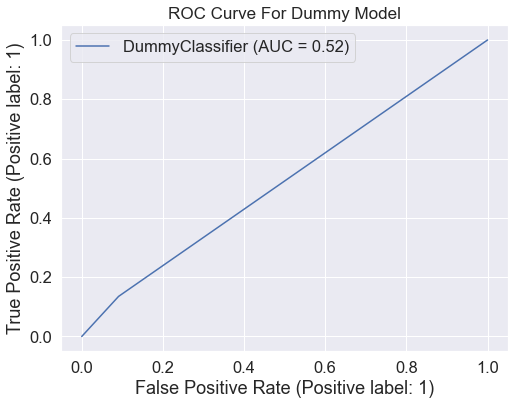

In [201]:
# Evaluating the model
pf.evaluate_model(dummy_clf, X_train_final, X_test_final, y_test, 
               title='Dummy Model')

# Logistic Regression

## Base Model

In [202]:
# Import package
from sklearn.linear_model import LogisticRegressionCV

In [203]:
# Creating classifier
logreg_clf = LogisticRegressionCV(class_weight='balanced', 
                                  random_state=123, 
                                  scoring=f2_scorer, 
                                  n_jobs=-1, cv=5)

# Fitting to the training data
logreg_base = logreg_clf.fit(X_train_final, y_train)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Logistic Regression Base Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.70      0.81      1917
    depressed       0.19      0.71      0.30       185

     accuracy                           0.71      2102
    macro avg       0.57      0.71      0.56      2102
 weighted avg       0.89      0.71      0.77      2102

__________________________________________________________________


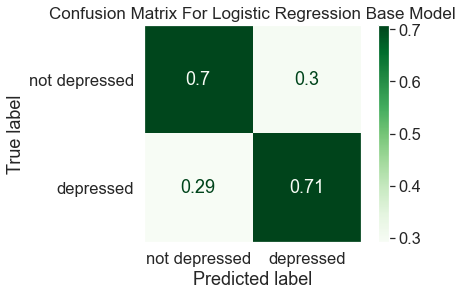

__________________________________________________________________


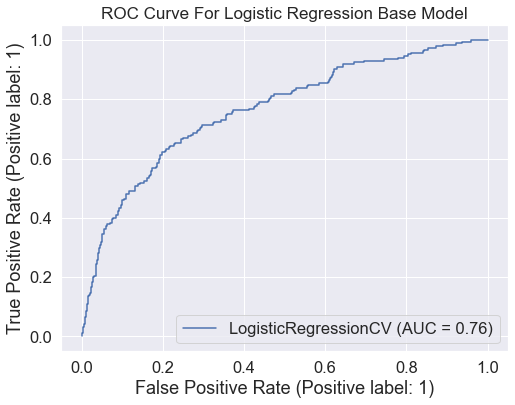

In [204]:
# Evaluating the model
pf.evaluate_model(logreg_base, X_train_final, X_test_final, y_test, 
               title='Logistic Regression Base Model')

## ElasticNet Model

In [205]:
# Creating classifier
logreg_clf = LogisticRegressionCV(class_weight='balanced',
                                  solver='saga',
                                  penalty='elasticnet',
                                  l1_ratios=[.1, .3, .5, .7, .9],
                                  random_state=123, 
                                  scoring=f2_scorer, 
                                  n_jobs=-1, cv=5)

# Fitting to the training data
logreg_elastic = logreg_clf.fit(X_train_final, y_train)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Logistic Regression ElasticNet Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.70      0.81      1917
    depressed       0.18      0.69      0.29       185

     accuracy                           0.70      2102
    macro avg       0.57      0.70      0.55      2102
 weighted avg       0.89      0.70      0.77      2102

__________________________________________________________________


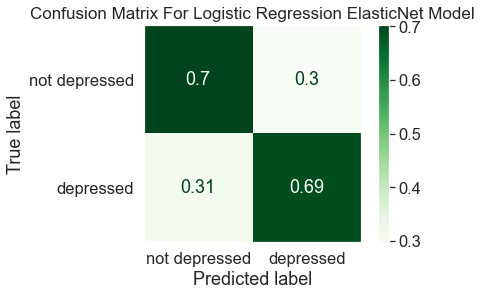

__________________________________________________________________


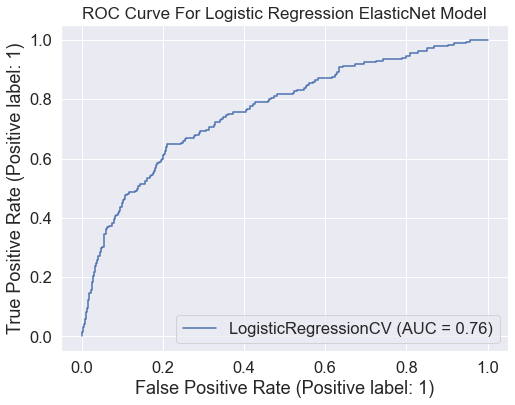

In [206]:
# Evaluating the model
pf.evaluate_model(logreg_elastic, X_train_final, X_test_final, y_test, 
               title='Logistic Regression ElasticNet Model')

## Grid Search

In [207]:
# Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [208]:
# Creating a list of C values
Cs_list = list(logreg_base.Cs_)
Cs_list

[0.0001,
 0.000774263682681127,
 0.005994842503189409,
 0.046415888336127774,
 0.3593813663804626,
 2.782559402207126,
 21.54434690031882,
 166.81005372000558,
 1291.5496650148827,
 10000.0]

In [209]:
# Listing parameters to test
logreg_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                 'C': Cs_list}

# Creating classifier
logreg_clf = LogisticRegression(class_weight='balanced', 
                                random_state=123)

# Feeding the parameters into the grid for testing
grid = GridSearchCV(logreg_clf, logreg_params, scoring=f2_scorer, 
                    n_jobs=-1, cv=3)

# Fitting to the training data
logreg_grid = grid.fit(X_train_final, y_train)

In [210]:
# Checking the best parameter results
logreg_grid.best_params_

{'C': 0.005994842503189409, 'solver': 'lbfgs'}

In [211]:
# Generating a list of C values to drill down on the optimal value
C_drill_list = list(np.linspace(logreg_grid.best_params_['C']/5, logreg_grid.best_params_['C']*5, 10))
C_drill_list.append(logreg_grid.best_params_['C'])
C_drill_list

[0.0011989685006378818,
 0.004396217835672234,
 0.007593467170706585,
 0.010790716505740936,
 0.013987965840775288,
 0.01718521517580964,
 0.020382464510843988,
 0.023579713845878342,
 0.026776963180912695,
 0.029974212515947042,
 0.005994842503189409]

In [212]:
# Listing parameters to test
logreg_params = {'C': C_drill_list}

# Creating classifier
logreg_clf = LogisticRegression(solver='newton-cg', 
                                class_weight='balanced', 
                                random_state=123)

# Feeding the parameters into the grid for testing
grid = GridSearchCV(logreg_clf, logreg_params, scoring=f2_scorer, 
                    n_jobs=-1, cv=3)

# Fitting to the training data
logreg_grid2 = grid.fit(X_train_final, y_train)

In [213]:
# Checking the best parameters
logreg_grid2.best_params_

{'C': 0.013987965840775288}

In [214]:
# The tuned model
logreg_gridmodel = logreg_grid2.best_estimator_
logreg_gridmodel

LogisticRegression(C=0.013987965840775288, class_weight='balanced',
                   random_state=123, solver='newton-cg')

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Tuned Logistic Regression Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.72      0.82      1917
    depressed       0.19      0.70      0.30       185

     accuracy                           0.72      2102
    macro avg       0.58      0.71      0.56      2102
 weighted avg       0.89      0.72      0.78      2102

__________________________________________________________________


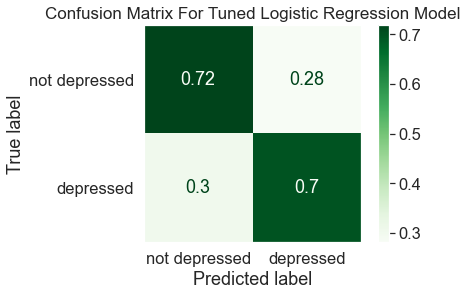

__________________________________________________________________


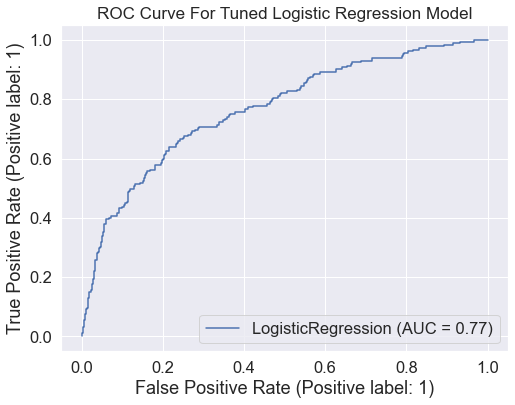

In [215]:
# Evaluating the model
pf.evaluate_model(logreg_gridmodel, X_train_final, X_test_final, y_test, 
               title='Tuned Logistic Regression Model')

### Stochastic Gradient Descent Linear Classifier

### Base Model

In [216]:
from sklearn.linear_model import SGDClassifier

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Stochastic Gradient Descent Base Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.60      0.74      1917
    depressed       0.15      0.75      0.25       185

     accuracy                           0.61      2102
    macro avg       0.56      0.67      0.49      2102
 weighted avg       0.89      0.61      0.69      2102

__________________________________________________________________


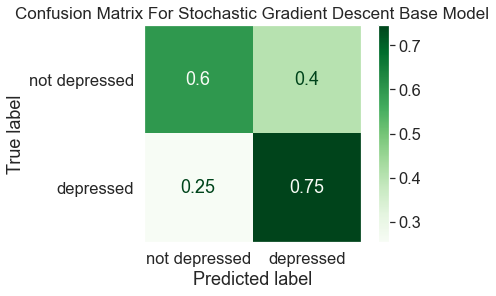

__________________________________________________________________


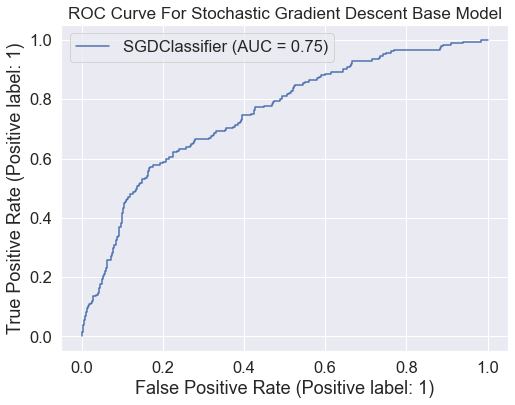

In [217]:
# Creating the classifier
sgd_clf = SGDClassifier(random_state=123, n_jobs=-1, 
                    class_weight='balanced')

# Fitting to the training data
sgd_base = sgd_clf.fit(X_train_final, y_train)
pf.evaluate_model(sgd_base, X_train_final, X_test_final, y_test, 
               title='Stochastic Gradient Descent Base Model')

### Grid Search

In [218]:
# Listing parameters to test
sgd_params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 
              'penalty': ['l2', 'l1', 'elasticnet'],
              'fit_intercept': [True, False], 
              'alpha': [.01, .001, .0001, .00001]}

# Creating classifier
sgd_clf = SGDClassifier(random_state=123, n_jobs=-1, 
                    class_weight='balanced')

# Feeding the parameters into the grid for testing
grid_final = GridSearchCV(sgd_clf, sgd_params, scoring=f2_scorer, 
                    n_jobs=-1, cv=3)

# Fitting to the training data
sgd_grid_final = grid_final.fit(X_train_final, y_train)

In [219]:
sgd_grid_final.best_params_

{'alpha': 0.001, 'fit_intercept': False, 'loss': 'log', 'penalty': 'l2'}

In [220]:
# Listing parameters to test
sgd_params = {'alpha': [1, .5, .1, .05, .01, .005]}

# Creating classifier
sgd_clf = SGDClassifier(random_state=123, n_jobs=-1, fit_intercept=True, 
                        loss='log', penalty='elasticnet', l1_ratio=.4,
                        class_weight='balanced')

# Feeding the parameters into the grid for testing
grid_final2 = GridSearchCV(sgd_clf, sgd_params, scoring=f2_scorer, 
                    n_jobs=-1, cv=3)

# Fitting to the training data
sgd_grid_final2 = grid_final2.fit(X_train_final, y_train)

In [221]:
sgd_grid_final2.best_params_

{'alpha': 0.01}

In [222]:
sgd_grid_finalmodel = sgd_grid_final2.best_estimator_
sgd_grid_finalmodel

SGDClassifier(alpha=0.01, class_weight='balanced', l1_ratio=0.4, loss='log',
              n_jobs=-1, penalty='elasticnet', random_state=123)

In [223]:
SGDClassifier(alpha=0.005, class_weight='balanced', l1_ratio=0.4, loss='log',
              n_jobs=-1, penalty='elasticnet', random_state=123)

SGDClassifier(alpha=0.005, class_weight='balanced', l1_ratio=0.4, loss='log',
              n_jobs=-1, penalty='elasticnet', random_state=123)

__________________________________________________________________
CLASSIFICATION REPORT FOR: 
	Stochastic Gradient Descent Model
__________________________________________________________________


               precision    recall  f1-score   support

not depressed       0.96      0.76      0.84      1917
    depressed       0.21      0.65      0.31       185

     accuracy                           0.75      2102
    macro avg       0.58      0.70      0.58      2102
 weighted avg       0.89      0.75      0.80      2102

__________________________________________________________________


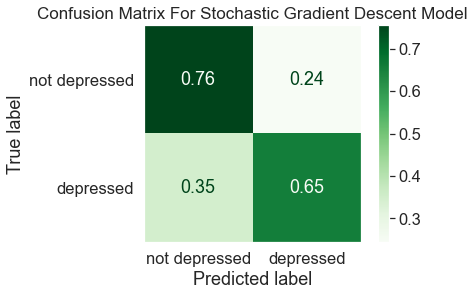

__________________________________________________________________


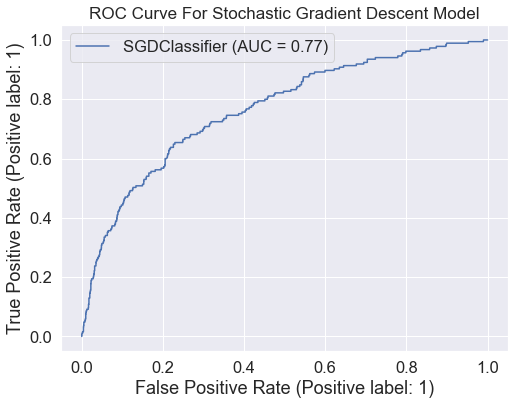

In [224]:
pf.evaluate_model(sgd_grid_finalmodel, X_train_final, X_test_final, y_test, 
               title='Stochastic Gradient Descent Model')